## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно 
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


In [1]:
# Импорт необходимых библиотек:
import pandas as pd
import numpy as np
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [1035]:
# Загружаем предоставленные наборы данных в память:
df_courses = pd.read_csv('courses.csv', index_col=0)
df_course_contents = pd.read_csv('course_contents.csv')
df_progresses = pd.read_csv('progresses.csv')
df_progress_phases = pd.read_csv('progress_phases.csv')
df_students = pd.read_csv('students.csv', parse_dates=['birthday'])

In [1036]:
# Объединяем данные:
cor_df = df_courses.merge(df_course_contents, left_on='id', right_on='course_id')
del(cor_df['id'])
df_progresses['progress_id'] = df_progresses['id'] 
del(df_progresses['id'])
cor_df = df_progresses.merge(cor_df)
data_df= df_progress_phases.merge(cor_df)

In [1037]:
# Проверка соединения датасетов:
data_df[data_df.student_id == '768c2987a744c51ce64a5993a2a94eaf'].head()

progress_id  module_number  lesson_number status  \
0  a387ab916f402cb3fbfffd29f68fd0ce              2              4   done   
1  a387ab916f402cb3fbfffd29f68fd0ce              1              1   done   
2  a387ab916f402cb3fbfffd29f68fd0ce              2              2   done   
3  a387ab916f402cb3fbfffd29f68fd0ce              1              4   done   
4  a387ab916f402cb3fbfffd29f68fd0ce              1              6   done   

                      start_date                    finish_date  \
0  2018-06-23 08:28:50.681065+00  2018-06-23 08:28:52.439542+00   
1  2018-06-20 14:25:21.783762+00  2018-06-20 15:45:07.717209+00   
2  2018-06-23 08:18:09.653771+00  2018-06-23 08:18:12.784616+00   
3   2018-06-20 16:00:06.36178+00  2018-06-21 19:09:30.845034+00   
4  2018-06-21 19:10:36.957891+00  2018-06-28 15:59:25.320418+00   

                         student_id                         course_id  \
0  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
1  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
2  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
3  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
4  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   

                title   field                             module_title  \
0  Веб-дизайн PRO 2.0  Design                    Концептуальный дизайн   
1  Веб-дизайн PRO 2.0  Design  Специализация и личное позиционирование   
2  Веб-дизайн PRO 2.0  Design                    Концептуальный дизайн   
3  Веб-дизайн PRO 2.0  Design  Специализация и личное позиционирование   
4  Веб-дизайн PRO 2.0  Design  Специализация и личное позиционирование   

                      lesson_title                          lesson_token  \
0                Практика — мокапы  7df8adef-1259-4b72-9bf2-353c73389d06   
1                      Интро курса  df1a1f20-cdf7-443d-b25b-0a4b990b84d9   
2  Что такое концептуальный дизайн  f23b1890-9365-406f-816b-04864cefe58f   
3          Личное позиционирование  9dd50916-4aa6-4a73-b86c-56a1bd7753c8   
4                  Домашняя работа  43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3   

   is_video  is_homework  
0      True        False  
1      True        False  
2      True        False  
3      True        False  
4     False         True

In [1038]:
# Посмотрим на получившиеся данные
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   progress_id    350677 non-null  object
 1   module_number  350677 non-null  int64 
 2   lesson_number  350677 non-null  int64 
 3   status         350677 non-null  object
 4   start_date     350677 non-null  object
 5   finish_date    334508 non-null  object
 6   student_id     350677 non-null  object
 7   course_id      350677 non-null  object
 8   title          350677 non-null  object
 9   field          350677 non-null  object
 10  module_title   350677 non-null  object
 11  lesson_title   350677 non-null  object
 12  lesson_token   350677 non-null  object
 13  is_video       350677 non-null  bool  
 14  is_homework    350677 non-null  bool  
dtypes: bool(2), int64(2), object(11)
memory usage: 38.1+ MB


Колонка finish_date имеет пропуски в данных, что неудивительно. 
Остальные данные содержат 350677 строк и 15 столбцов

In [1039]:
# Общее количество курсов в датасете:
data_df['title'].drop_duplicates().count()

15

In [1040]:
# Количество модулей на каждом курсе:
data_df[['title', 'module_number']]\
    .drop_duplicates().groupby('title')['module_number']\
    .count()\
    .reset_index(name='module_count')\
    .sort_values('module_count', ascending=False)

title  module_count
7                  Анимация интерфейсов            21
6                             UX-дизайн            20
12                      Веб-разработчик            20
11                Веб-дизайн с нуля 2.0            19
3                     JavaScript с нуля            18
13        Интернет-маркетолог от Ingate            18
1                      Java-разработчик            17
9                    Веб-дизайн PRO 2.0            17
10                   Веб-дизайн Базовый            17
14        Руководитель digital-проектов            17
5              SMM-маркетолог от А до Я            11
0                         Excel Базовый             9
2               Java-разработчик c нуля             9
4   PHP-разработчик с 0 до PRO. Часть 1             8
8        Веб-вёрстка для начинающих 2.0             8

In [1041]:
# Количество уроков в каждом модуле на каждом курсе:
course_count_df = data_df[['title', 'module_number', 'lesson_token']]\
    .drop_duplicates()\
    .groupby(['title', 'module_number'])['lesson_token']\
    .count()\
    .reset_index(name='lesson_count')
# выведем данные
course_count_df

title  module_number  lesson_count
0                    Excel Базовый              1            11
1                    Excel Базовый              2             7
2                    Excel Базовый              3             3
3                    Excel Базовый              4             7
4                    Excel Базовый              5             5
..                             ...            ...           ...
224  Руководитель digital-проектов             13             4
225  Руководитель digital-проектов             14             7
226  Руководитель digital-проектов             15            12
227  Руководитель digital-проектов             16             8
228  Руководитель digital-проектов             17             4

[229 rows x 3 columns]

In [1042]:
# Медианное количество уроков в модуле на каждом курсе:
med_les_count = course_count_df\
    .groupby('title')['lesson_count']\
    .median()\
    .astype(int)\
    .reset_index(name='lesson_median')\
    .sort_values('lesson_median', ascending=False)
# выведем данные
med_les_count

title  lesson_median
2               Java-разработчик c нуля             13
1                      Java-разработчик              7
3                     JavaScript с нуля              7
8        Веб-вёрстка для начинающих 2.0              7
5              SMM-маркетолог от А до Я              6
13        Интернет-маркетолог от Ingate              6
0                         Excel Базовый              5
9                    Веб-дизайн PRO 2.0              5
14        Руководитель digital-проектов              5
4   PHP-разработчик с 0 до PRO. Часть 1              4
11                Веб-дизайн с нуля 2.0              4
6                             UX-дизайн              3
7                  Анимация интерфейсов              3
10                   Веб-дизайн Базовый              3
12                      Веб-разработчик              2

In [1043]:
# Количество учеников на каждом курсе:
student_count = data_df[['title', 'student_id']]\
    .drop_duplicates()\
    .groupby('title')['student_id']\
    .count()\
    .reset_index(name='student_count')\
    .sort_values('student_count', ascending=False)
# выведем данные
student_count

title  student_count
13        Интернет-маркетолог от Ingate           2168
11                Веб-дизайн с нуля 2.0           2014
8        Веб-вёрстка для начинающих 2.0           2004
9                    Веб-дизайн PRO 2.0           1711
6                             UX-дизайн           1151
3                     JavaScript с нуля            966
4   PHP-разработчик с 0 до PRO. Часть 1            854
0                         Excel Базовый            782
1                      Java-разработчик            763
14        Руководитель digital-проектов            685
12                      Веб-разработчик            628
7                  Анимация интерфейсов            598
2               Java-разработчик c нуля            581
10                   Веб-дизайн Базовый            518
5              SMM-маркетолог от А до Я            506

In [1084]:
# посмотрим на статистики распределения
desc_stud = student_count.describe()
# рассчитаем общее количество студентов
desc_stud.loc['sum'] = student_count.student_count.sum()
# выведем данные
desc_stud

student_count
count      15.000000
mean     1061.933333
std       600.506984
min       506.000000
25%       613.000000
50%       782.000000
75%      1431.000000
max      2168.000000
sum     15929.000000

In [1085]:
# Минимальный, максимальный, средний, медианный возраст студентов.
# Посмотрим на данные
df_students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11363 entries, 1 to 43804
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id_       11363 non-null  int64         
 1   id        11363 non-null  object        
 2   city      11363 non-null  object        
 3   birthday  11355 non-null  datetime64[ns]
 4   age       11355 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 532.6+ KB


Колонка birthday, которая нам необходима, содержит пропуски и неопределенный тип данных

In [1086]:
# Мы не сможем заполнить пропуски в колонке birthday, не создав сильного влияния на данные, поэтому удалим их
df_students.dropna(inplace = True)
# изменим тип данных
df_students['birthday'] = pd.to_datetime(df_students['birthday'], errors = 'coerce')
# посчитаем возраст
df_students['age'] = datetime.datetime.now() - df_students['birthday']
# добавим колонку возраста
df_students['age'] = (df_students['age'].dt.days)//365
# посмотрим на данные с отсечением аномальных значений
df_students.describe(percentiles=[.01, .99])

id_           age
count   11355.000000  11355.000000
mean    52721.560018     32.338177
std     32314.052419      8.356780
min      3898.000000   -177.000000
1%      17824.620000     17.000000
50%     37362.000000     32.000000
99%    119852.020000     54.000000
max    124493.000000    138.000000

Возраст студентов: минимальный: 17 лет, максимальный: 54 года, средний:  32 года,  медианный:  32 года.

In [1087]:
# Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
# Отсечем аномальные значения
df_students.age[df_students.age < df_students.age.quantile(.01)] = df_students.age.quantile(.01)
df_students.age[df_students.age > df_students.age.quantile(.99)] = df_students.age.quantile(.99)
# соединим данные возраста студентов с основными данными
age_stud_course_df = df_students[['id', 'age']]\
    .merge(data_df[['student_id', 'title']], left_on='id', right_on='student_id')
# рассчитаем основные статистики
age_stud_course_df = age_stud_course_df\
    .drop_duplicates()[['title', 'age']]\
    .groupby('title')['age']\
    .describe()
# выведем данные
age_stud_course_df

count       mean       std   min   25%  \
title                                                                          
Excel Базовый                         362.0  36.560773  6.625972  17.0  32.0   
Java-разработчик                      571.0  32.234676  7.518230  17.0  27.0   
Java-разработчик c нуля               311.0  31.926045  7.194375  17.0  27.0   
JavaScript с нуля                     751.0  31.420772  6.585138  17.0  27.0   
PHP-разработчик с 0 до PRO. Часть 1   671.0  32.104322  7.236588  17.0  27.0   
SMM-маркетолог от А до Я              213.0  32.502347  7.016574  17.0  27.0   
UX-дизайн                             846.0  32.917258  5.953489  17.0  29.0   
Анимация интерфейсов                  480.0  32.452083  5.980989  17.0  28.0   
Веб-вёрстка для начинающих 2.0       1345.0  31.374721  6.646648  17.0  27.0   
Веб-дизайн PRO 2.0                   1382.0  31.351664  6.614287  17.0  27.0   
Веб-дизайн Базовый                    342.0  31.508772  6.477453  18.0  27.0   
Веб-дизайн с нуля 2.0                1353.0  31.304508  6.760185  17.0  27.0   
Веб-разработчик                       425.0  31.070588  6.165539  17.0  27.0   
Интернет-маркетолог от Ingate        1197.0  34.390142  6.637585  17.0  30.0   
Руководитель digital-проектов         411.0  34.552311  5.513537  17.0  31.0   

                                      50%   75%   max  
title                                                  
Excel Базовый                        37.0  41.0  54.0  
Java-разработчик                     31.0  36.0  54.0  
Java-разработчик c нуля              31.0  36.0  54.0  
JavaScript с нуля                    31.0  35.0  54.0  
PHP-разработчик с 0 до PRO. Часть 1  31.0  36.0  54.0  
SMM-маркетолог от А до Я             32.0  36.0  54.0  
UX-дизайн                            32.0  36.0  54.0  
Анимация интерфейсов                 32.0  36.0  54.0  
Веб-вёрстка для начинающих 2.0       31.0  35.0  54.0  
Веб-дизайн PRO 2.0                   30.0  35.0  54.0  
Веб-дизайн Базовый                   31.0  35.0  54.0  
Веб-дизайн с нуля 2.0                30.0  35.0  54.0  
Веб-разработчик                      30.0  35.0  54.0  
Интернет-маркетолог от Ingate        33.0  39.0  54.0  
Руководитель digital-проектов        34.0  38.0  50.0

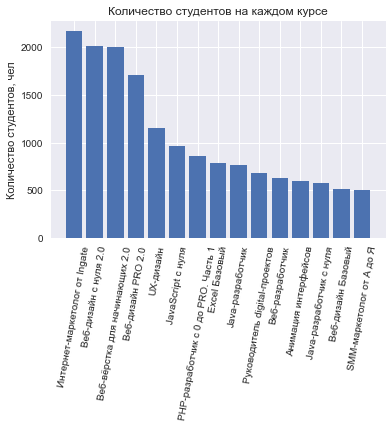

In [1048]:
# Строим bar-chart, отражающий количество студентов на каждом курсе
plt.bar(student_count['title'], student_count['student_count'])
plt.ylabel('Количество студентов, чел')
plt.title('Количество студентов на каждом курсе')
plt.xticks(rotation=80)
plt.show()

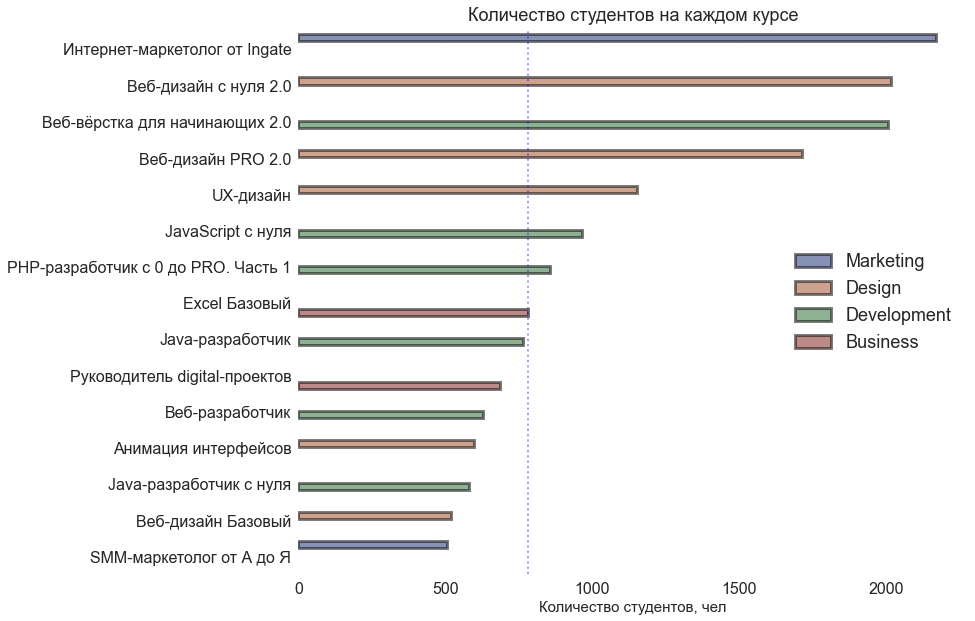

In [1049]:
# Строим горизонтальный bar-chart, отражающий количество студентов на каждом курсе

# Выберем данные для визуализации
student_count['field'] = data_df[['title', 'field']]\
    .groupby(['title'])['field']\
    .unique()\
    .reset_index()['field']\
    .apply(lambda x: x[0])

student_count = student_count.sort_values('student_count', ascending=False)

# Инициализируем график(задаем размеры будущей визуализации, кол-во графиков, их расположение, а так же их размер)
# Получим обьекты класса Figure и Axses
fig, ax = plt.subplots(figsize=(12, 10))

# Добавляем данные графику, выбираем его тип
sns.barplot(data=student_count, x='student_count', y='title', ax=ax, alpha=0.5, ci=None, palette='dark',\
            linewidth=3, edgecolor='black', hue=student_count.field)
plt.legend(fontsize=18)
# Создадим линию медианы, зададим ее толщину, цвет, прозрачность и вид
ax.axvline(x=student_count['student_count'].median(), linewidth=2, color='b', alpha=0.4, ls=':')

# Для добавления атрибутов графика используем методы сеттеры, с помощью которых подписываем название графика и оси
ax.set_xlabel('Количество студентов, чел', fontsize=15)
ax.set_ylabel(None)
ax.set_title('Количество студентов на каждом курсе', fontsize=18, pad=10)
plt.tick_params(labelsize=16)

# убираем рамку у графика
plt.box(False)
plt.show()

## На основании рассчитанных значений можно сделать следующие выводы:
- Представленные файлы содержат данные по **15** курсам.
- Каждый курс состоит из модулей. Кол-во модулей в курсе от **8 до 21**. 
  Больше всего модулей в курсах: Анимация интерфейсов - **21**шт.; UX-дизайн - **20** шт; Веб-разработчик - **20** шт. 
  Меньше всего модулей в курсах: PHP-разработчик с 0 до PRO. Часть 1 - **8** шт; Веб-вёрстка для начинающих 2.0 - **8** шт
- В свою очередь каждый модуль состоит из отдельных уроков в кол-ве от **2 до 13**. 
  Больше всего уроков в курсе: Java-разработчик c нуля - **13** шт., меньше всего: Веб-разработчик - **2** шт.
- Самым популярным является курс - **Интернет-маркетолог от Ingate**, на нем обучается **2168** студентов,
  самым не популярным - **SMM-маркетолог от А до Я**, на нем обучается **506** студентов.
- В среднем на курсе обучается **1062** студентa. Общее кол-во студентов: **15929** человек.
- Средний возраст студентов - **32** год. Минимальный: **17** лет, максимальный: **54** года.
- Самый 'возрастной' курс - Excel Базовый, средний возраст студентов - **36.5** лет, 
  самый 'молодой' - Веб-разработчик, средний возраст студентов - **31** год.
- Наиболее востребованными курсами являются: Интернет-маркетолог от Ingate, Веб-дизайн с нуля 2.0, Веб-вёрстка для начинающих, Веб-дизайн PRO 2.0. Наименее востребованными являются: Веб-дизайн Базовый, SMM-маркетолог от А до Я.
- По направлениям курсы разделяются на: 
 - сфера *Разработка* - **6** курсов;
 - сфера *Дизайн* - **5** курсов;
 - сфера *Маркетинг* - **2** курса;
 - сфера *Бизнес* - **2** курса;
- По кол-ву студентов превалируют курсы в сфере - **Дизайн**, менее в сфере - **Бизнес**.

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно 
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно 
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

### 1. Расчет прироста студентов на каждом курсе в каждом месяце за всю историю.

In [1050]:
# Изменим тип данных колонки с датой начала прохождения курса
data_df['start_date'] = pd.to_datetime(data_df['start_date'], errors = 'coerce')
# возьмем данные за каждый месяц в диапазоне от марта 2016 до июля 2019 включительно
df_data = data_df[(data_df['start_date'] >= '2016-03-01')&(data_df['start_date'] <= '2019-07-31')]
# создадим колонку с номером месяца и года
df_data['start_month'] = df_data['start_date'].dt.month
df_data['start_year'] = df_data['start_date'].dt.year
# возьмем только те данные, по которым есть домашняя работа
df_data = df_data[df_data.is_homework == True]
# отсортируем данные по первой дате начала прохождения курса
df_student_count = df_data[['title', 'student_id', 'start_date', 'start_month', 'start_year']]\
    .sort_values('start_date', ascending=True)\
    .groupby(['title', 'student_id'])\
    .agg({'start_month': 'first', 'start_year': 'first'})\
    .sort_values('start_year', ascending=True)

df_student_count.reset_index(inplace= True , level = ['student_id'])
# кол-во студентов на каждом курсе в каждом месяце
df_student_count = df_student_count\
    .groupby(['title', 'start_year', 'start_month'])['student_id']\
    .count()\
    .reset_index(name='student_counts')
# обьединим месяц с годом в единую дату
df_student_count['date'] = pd.to_datetime(df_student_count[['start_year', 'start_month']]\
                                          .astype(str)\
                                          .add(' ')\
                                          .sum(1))\
                                          .dt.strftime('%Y-%m')
# отберем данные                                          
df_student_count = df_student_count[['title', 'student_counts', 'date']]
# создадим таблицу с данными о количестве студентов на каждом курсе в каждом месяце за всю историю
df_student_count = pd.pivot_table(df_student_count,
               index=['date'], columns=['title'], fill_value=0)\
               .reset_index()
# выведем датафрейм с данными о количестве студентов на каждом курсе в каждом месяце за всю историю
df_student_count.head()

date student_counts                                           \
title           Excel Базовый Java-разработчик Java-разработчик c нуля   
0      2016-03              0                0                       0   
1      2016-11              0                0                       0   
2      2017-03              0                0                       0   
3      2017-04              0                0                       0   
4      2017-05              0                0                       0   

                                                             \
title JavaScript с нуля PHP-разработчик с 0 до PRO. Часть 1   
0                     0                                   0   
1                     0                                   0   
2                     0                                   0   
3                     0                                   0   
4                     0                                   0   

                                                               \
title SMM-маркетолог от А до Я UX-дизайн Анимация интерфейсов   
0                            0         0                    0   
1                            0         2                    0   
2                            0         0                    0   
3                            0         1                    0   
4                            0         1                    0   

                                                                            \
title Веб-вёрстка для начинающих 2.0 Веб-дизайн PRO 2.0 Веб-дизайн Базовый   
0                                  0                  0                  0   
1                                  0                  0                  0   
2                                  0                  0                  2   
3                                  0                  0                  0   
4                                  0                  0                  0   

                                                                           \
title Веб-дизайн с нуля 2.0 Веб-разработчик Интернет-маркетолог от Ingate   
0                         0               1                             0   
1                         0               0                             0   
2                         0               0                             0   
3                         0               1                             0   
4                         0               0                             0   

                                     
title Руководитель digital-проектов  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 1

###  2. Line-graph с приростом студентов в каждом месяце для каждого курса

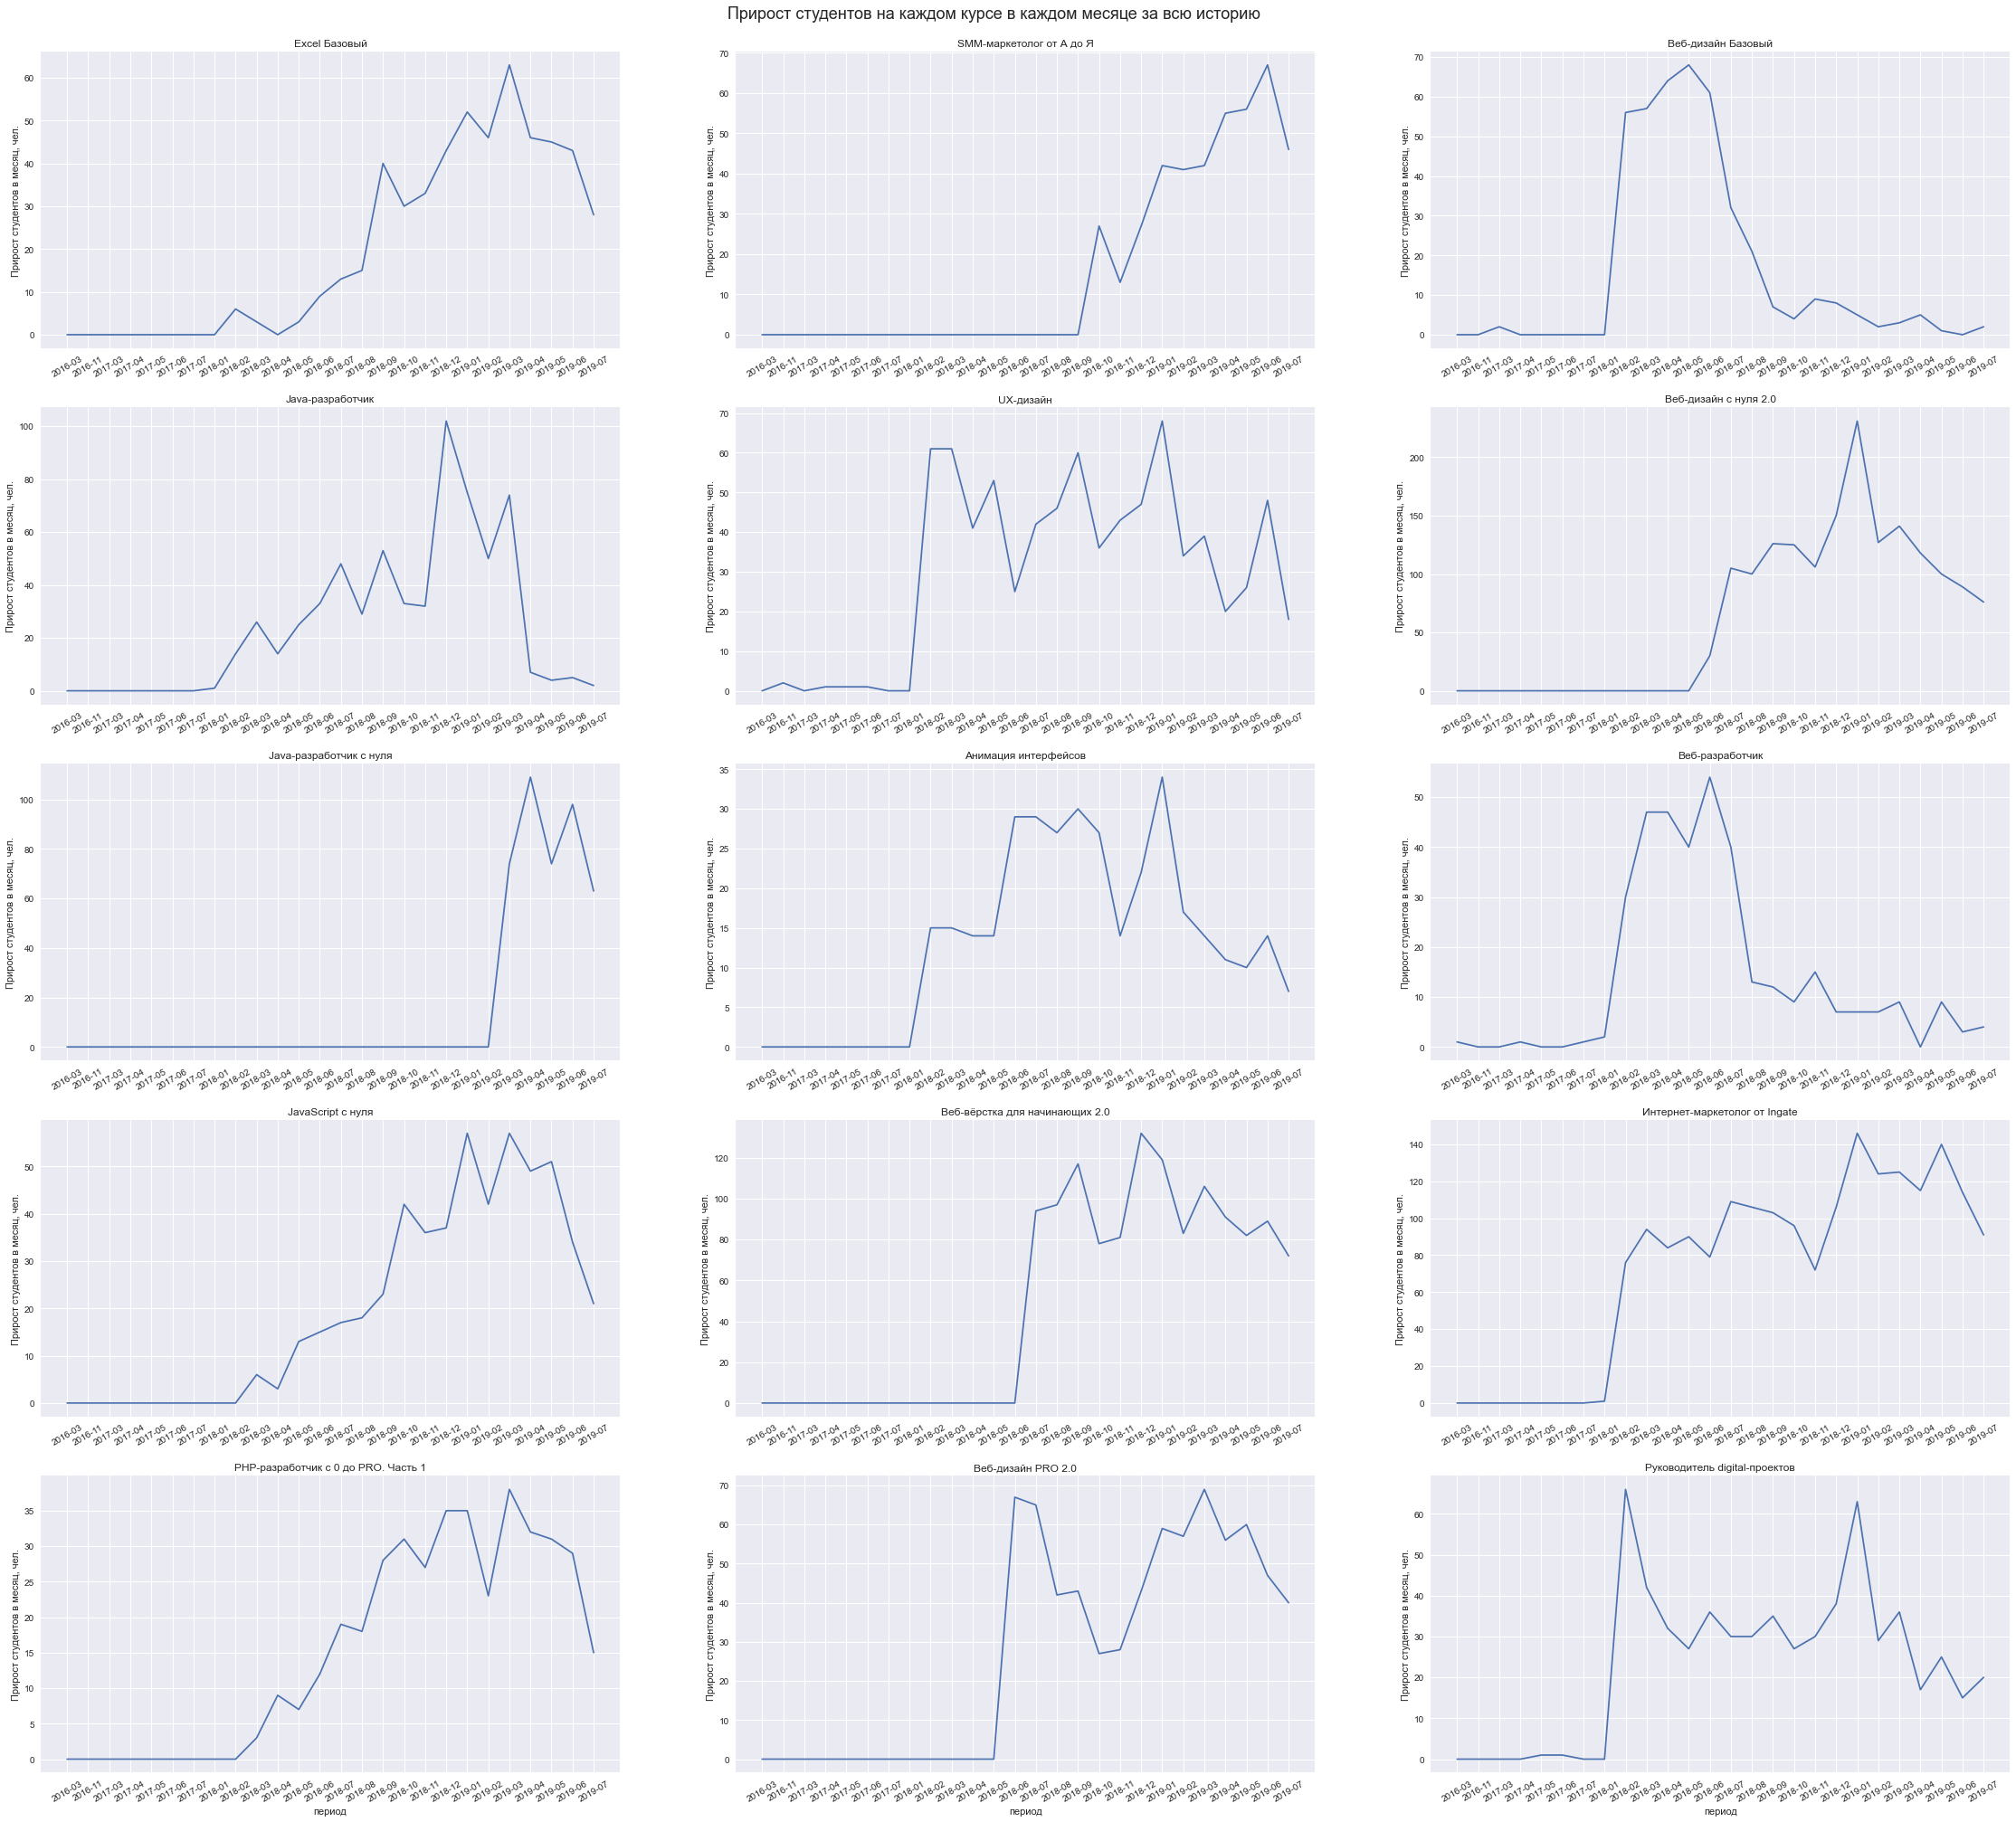

In [1052]:
# Инициализируем график(зададим параметры будущей визуализации, кол-во графиков, их расположение, а так же их размер)
# Получим обьекты класса Figure и Axses
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(39,35))
# Создаем список с названиями курсов
title_courses = df_student_count.student_counts.columns

# С помощью цикла для каждого графика добавляем данные, выбираем его тип, подписываем название графиков и подписываем оси
count = 0
for i in range(3):
    for j in range(5):
        ax = axs[j][i]
        ax.plot(df_student_count.date, df_student_count.student_counts[title_courses[count]])
        ax.set_ylabel('Прирост студентов в месяц, чел.')
        ax.set_title(f'{title_courses[count]}')
        # повернем тики оси х
        plt.setp(ax.get_xticklabels(), rotation=30)
        count += 1
    ax.set_xlabel('период')
fig.suptitle('Прирост студентов на каждом курсе в каждом месяце за всю историю', y=0.9, size=18)
plt.show()

###  3. Line-graph с приростом студентов в каждом месяце для каждого курса

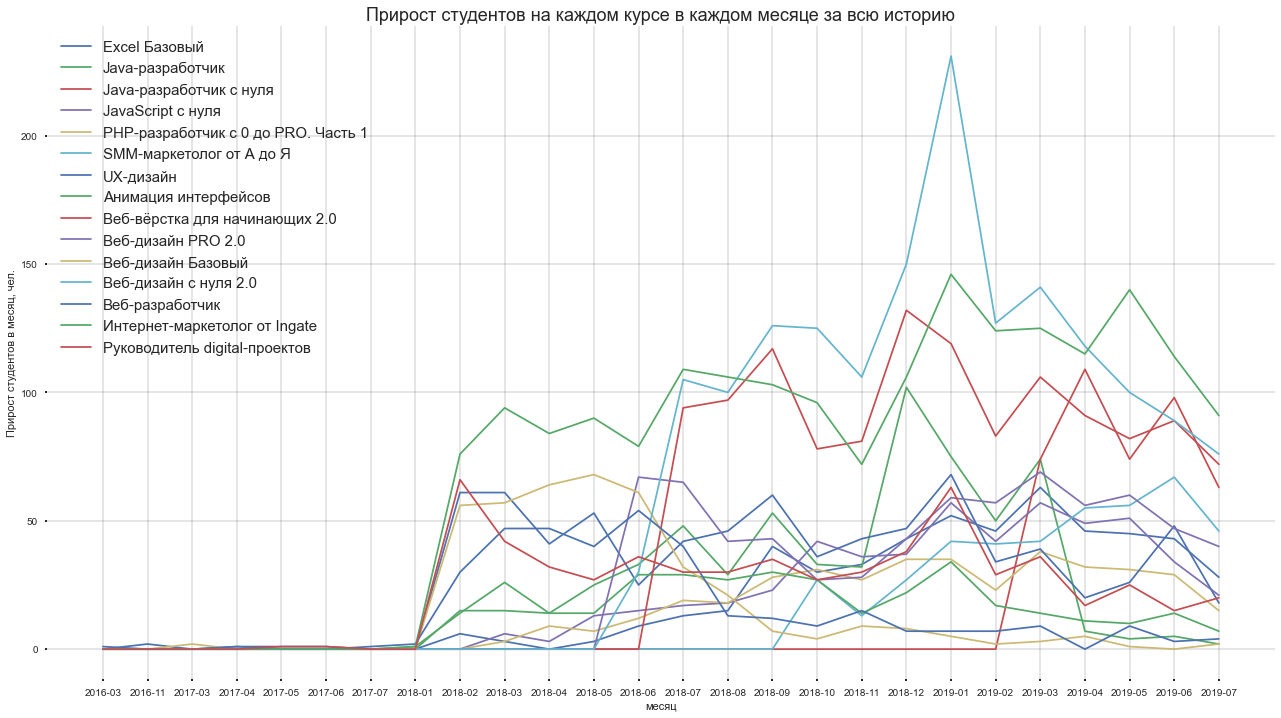

In [1053]:
# инициализируем график(зададим размеры будущей визуализации)
fig, ax = plt.subplots(figsize=(22, 12))

# с помощью цикла для каждого графика добавляем данные, выбираем его тип, подписываем название графика и подписываем оси, 
for i in title_courses:
    ax.plot(df_student_count.date, df_student_count.student_counts[i], label=i)
    ax.set_ylabel('Прирост студентов в месяц, чел.')
    ax.set_xlabel('месяц')
    ax.grid(color = 'black', linewidth = .2)
    ax.tick_params(width=2, length=2)
# создаем легенду для каждого графика
plt.legend(prop={'size': 15})
ax.set_title('Прирост студентов на каждом курсе в каждом месяце за всю историю', size=18)
# убираем рамку у графика
plt.box(False)
plt.show()

### 4. Расчет количества прогрессов по выполнению домашних работ в каждом месяце за всю историю 

In [1054]:
# создадим копию данных
df_prog = data_df.copy()
# возьмем только те данные, по которым есть домашняя работа
df_prog = df_prog[df_prog.is_homework == True]
# изменим тип данных колонок с датами начала и конца прохождения курса
df_prog['start_date'] = pd.to_datetime(df_prog['start_date'], errors = 'coerce')
df_prog['finish_date'] = pd.to_datetime(df_prog['finish_date'], errors = 'coerce')
# колонка с датой окончания курса, содержит пропуски, так как, какие-то работы еще не закончены в настоящий момент
# поэтому заменим пропуски на крайнюю дату, чтобы учесть этот месяц прогресса
df_prog['finish_date'].fillna('2019-07-31', inplace=True)
# возьмем данные в диапазоне от марта 2016 до июля 2019 включительно
df_prog = df_prog[(df_prog['start_date'] >= '2016-03-01')&(df_prog['finish_date'] <= '2019-07-31')]
# оставим только дату
df_prog['start_date'] = df_prog['start_date'].dt.date
df_prog['finish_date'] = df_prog['finish_date'].dt.date
# создадим столбец со всеми датами, в которых имеется прогресс по выполнению домашней работы
df_prog['diff_months']=df_prog\
     .apply(lambda x: pd.date_range(x['start_date'] 
                                    , x['finish_date'] + pd.offsets.MonthEnd()
                                    , freq='M'), axis=1)

In [1055]:
# выведем данные из списков
df_prog = df_prog.explode('diff_months')
# посчитаем количество прогрессов
df_prog_count = df_prog.groupby(['title', 'diff_months'])['progress_id']\
    .count()\
    .reset_index()
# введем ограничение по максимальной дате
df_prog_count = df_prog_count[df_prog_count['diff_months'] <= '2019-07-31']
# создадим таблицу с данными о количестве прогрессов повыполнению домашних работ на каждом курсе в каждом месяце за всю историю
df_prog_count = pd.pivot_table(df_prog_count,
               index=['diff_months'], columns=['title'], fill_value=0)\
               .reset_index()
# преобразуем форму даты
df_prog_count.diff_months = df_prog_count.diff_months.dt.strftime('%Y-%m')
# выведем полученные данные 
df_prog_count

diff_months   progress_id                                           \
title             Excel Базовый Java-разработчик Java-разработчик c нуля   
0         2016-03             0                0                       0   
1         2016-11             0                0                       0   
2         2016-12             0                0                       0   
3         2017-01             0                0                       0   
4         2017-02             0                0                       0   
5         2017-03             0                0                       0   
6         2017-04             0                0                       0   
7         2017-05             0                0                       0   
8         2017-06             0                0                       0   
9         2017-07             0                0                       0   
10        2018-01             0                1                       0   
11        2018-02            37               29                       0   
12        2018-03            10              116                       0   
13        2018-04            16              126                       0   
14        2018-05            21              144                       0   
15        2018-06            41              203                       0   
16        2018-07            85              274                       0   
17        2018-08           104              282                       0   
18        2018-09           206              320                       0   
19        2018-10           264              395                       0   
20        2018-11           272              397                       0   
21        2018-12           294              573                       0   
22        2019-01           424              686                       0   
23        2019-02           448              716                       0   
24        2019-03           489              815                     120   
25        2019-04           497              668                     565   
26        2019-05           534              614                     786   
27        2019-06           546              584                    1143   
28        2019-07           508              544                    1080   

                                                             \
title JavaScript с нуля PHP-разработчик с 0 до PRO. Часть 1   
0                     0                                   0   
1                     0                                   0   
2                     0                                   0   
3                     0                                   0   
4                     0                                   0   
5                     0                                   0   
6                     0                                   0   
7                     0                                   0   
8                     0                                   0   
9                     0                                   0   
10                    0                                   0   
11                    0                                   0   
12                   12                                   4   
13                   23                                  26   
14                   38                                  41   
15                   63                                  65   
16                  114                                 107   
17                  130                                 110   
18                  151                                 156   
19                  229                                 203   
20                  272                                 215   
21                  319                                 277   
22                  477                                 334   
23                  517                                 313   
24         

### 5. Line-graph с количество прогрессов по выполнению домашних работ в каждом месяце за всю историю

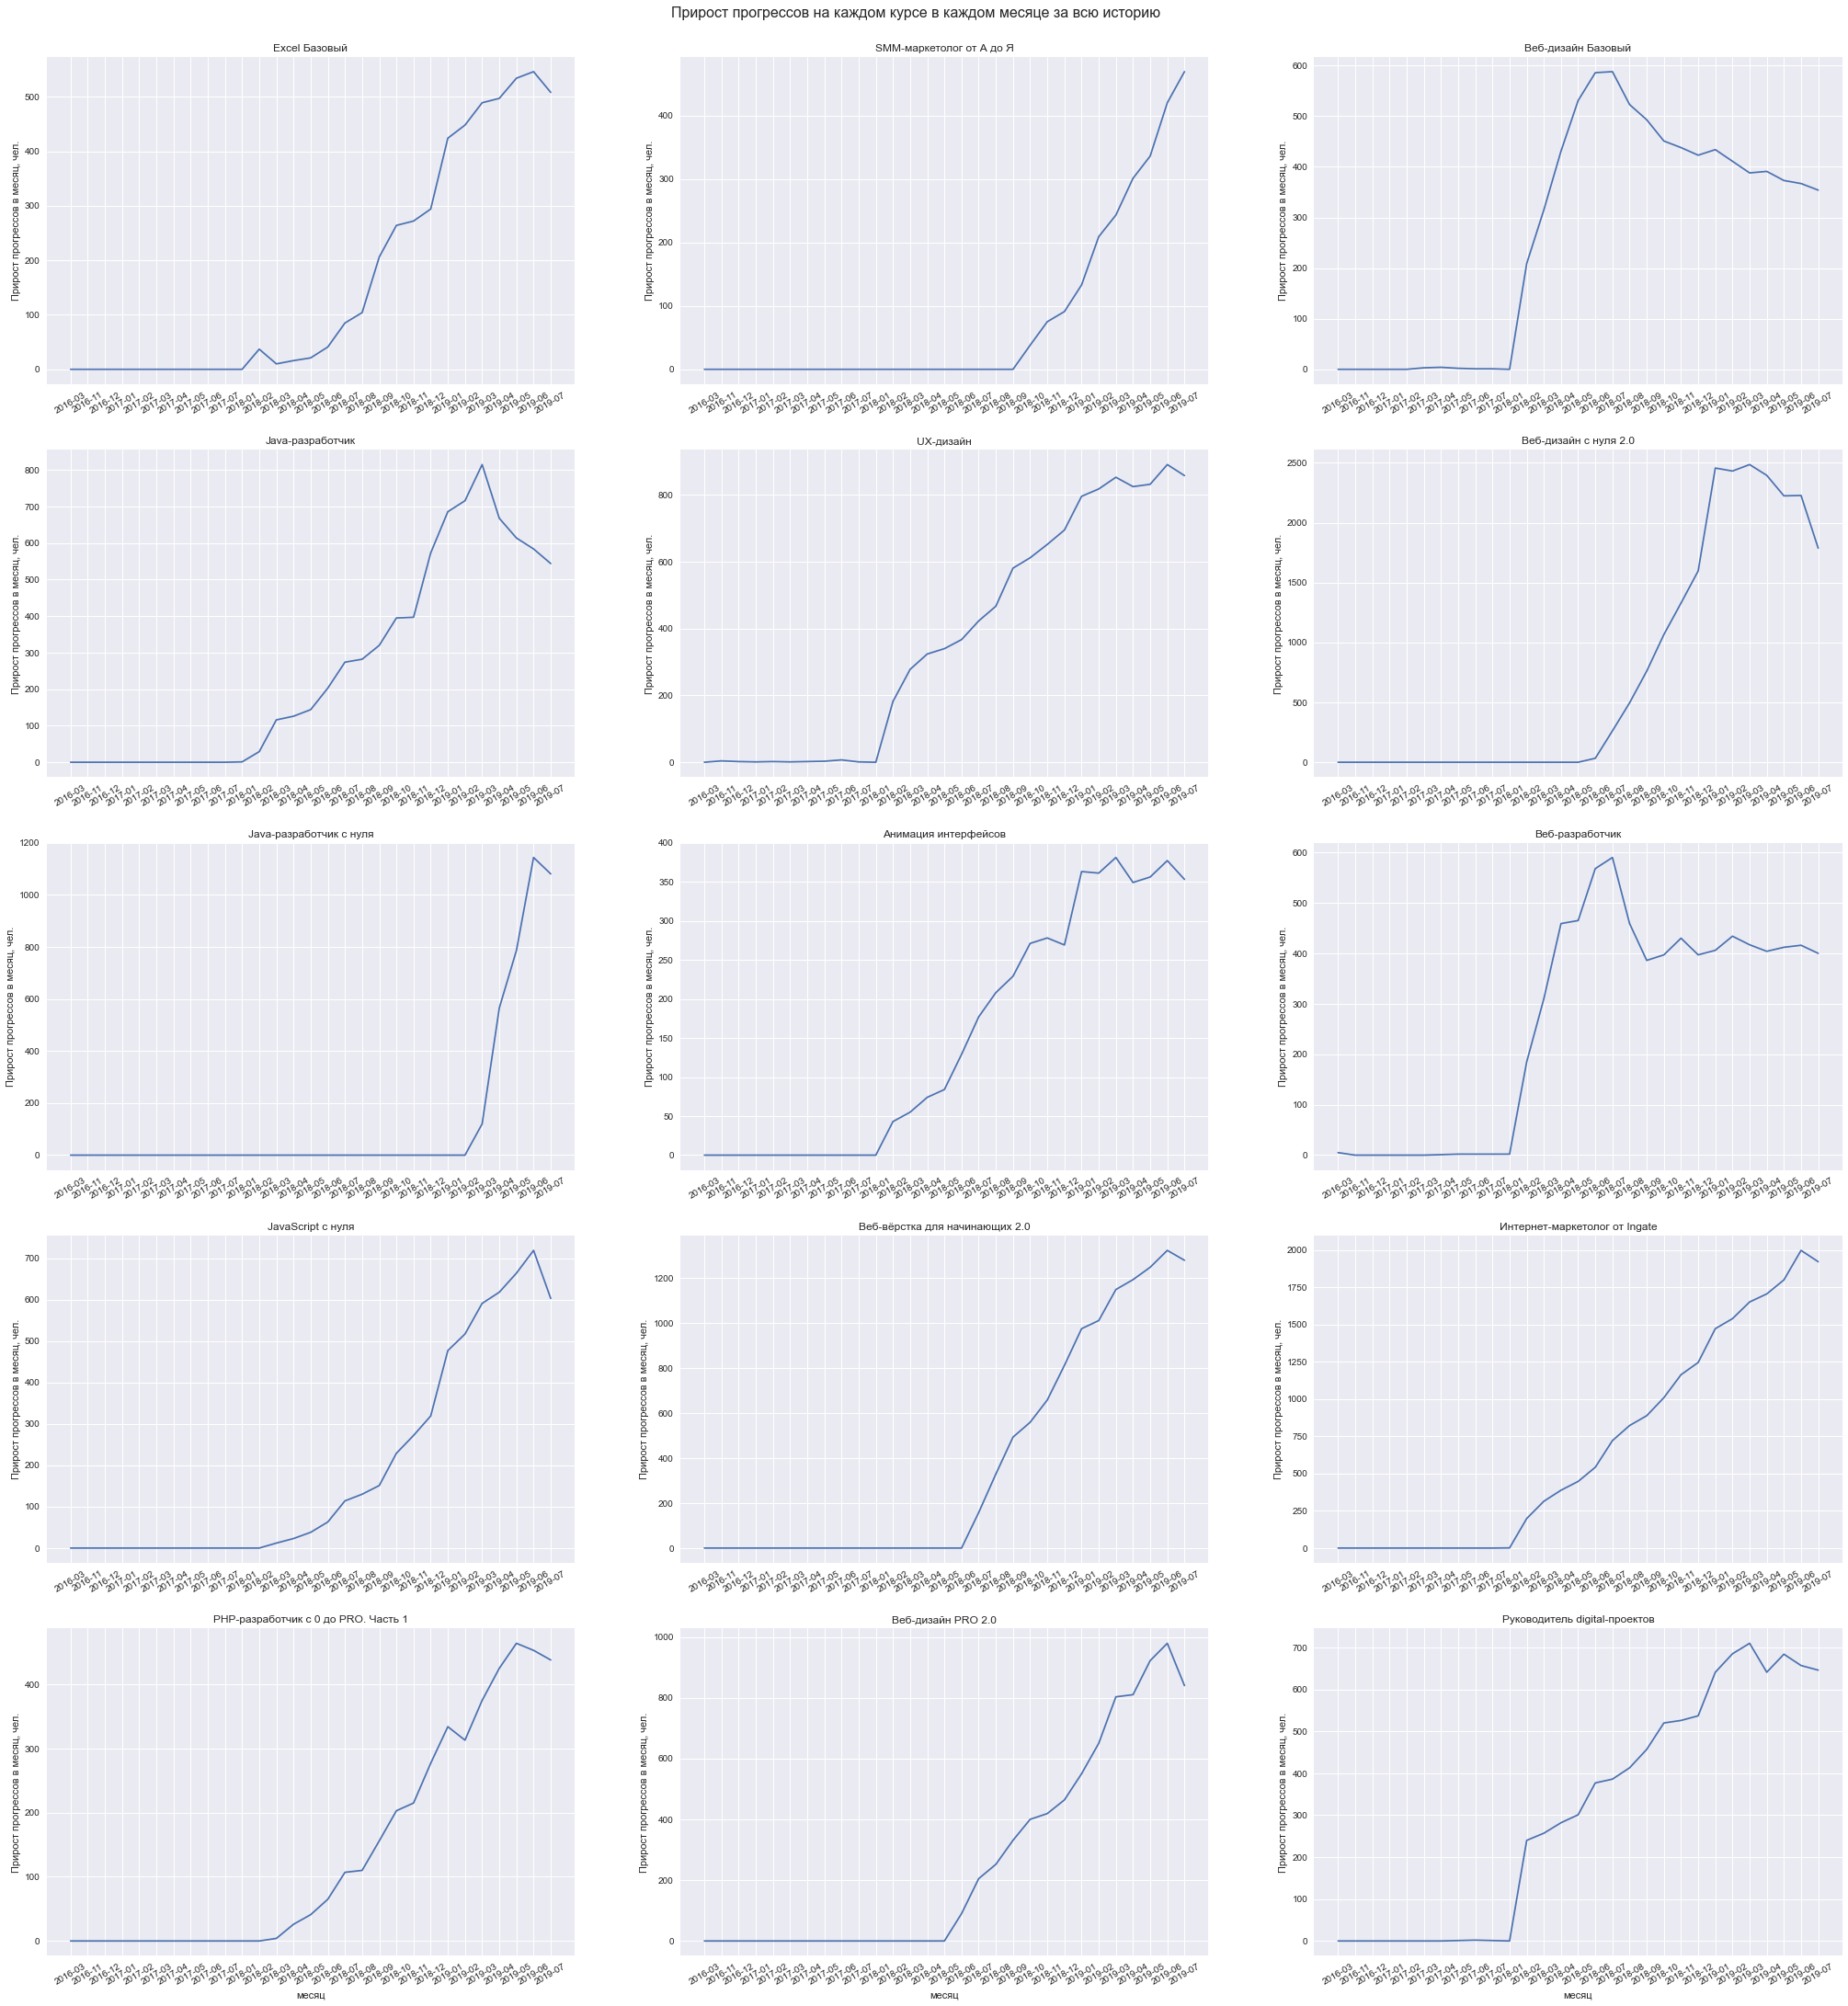

In [1056]:
# Инициализируем график(зададим размеры будущей визуализации, кол-во графиков, их расположение, а так же их размер)
# Получим обьекты класса Figure и Axses
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(35,38))

# С помощью цикла для каждого графика добавляем данные, выбираем его тип, подписываем название графиков и подписываем оси
count = 0
for i in range(3):
    for j in range(5):
        ax = axs[j][i]
        ax.plot(df_prog_count.diff_months, df_prog_count.progress_id[title_courses[count]])
        ax.set_ylabel('Прирост прогрессов в месяц, чел.')
        ax.set_title(f'{title_courses[count]}')
        # повернем тики оси х
        plt.setp(ax.get_xticklabels(), rotation=30)
        count += 1
    ax.set_xlabel('месяц')
fig.suptitle('Прирост прогрессов на каждом курсе в каждом месяце за всю историю', y=0.9, size=16)
plt.show()

### 6. Line-graph с приростом прогрессов в каждом месяце для каждого курса 

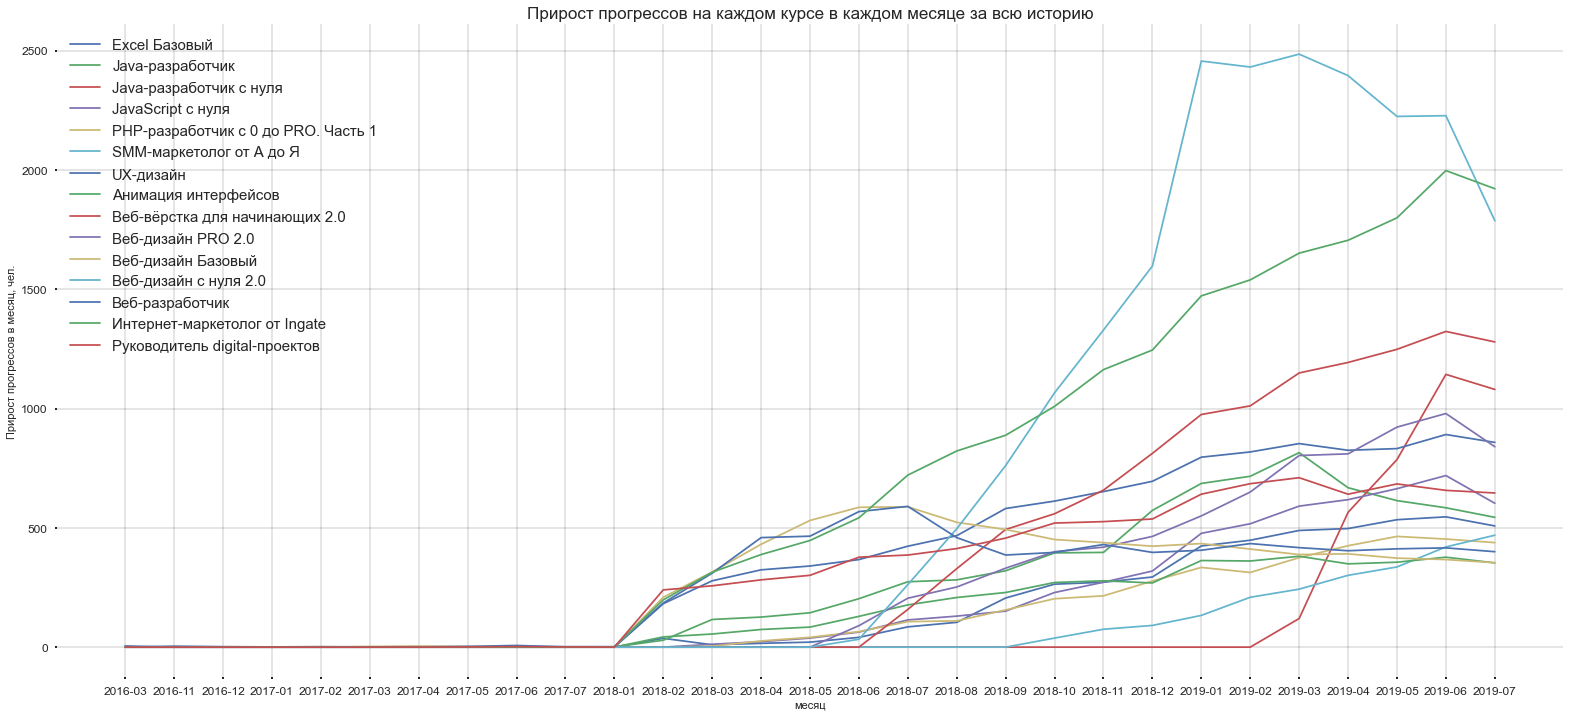

In [1057]:
# инициализируем график(зададим размеры будущей визуализации)
fig, ax = plt.subplots(figsize=(27, 12))

# с помощью цикла для каждого графика добавляем данные, выбираем его тип, подписываем название графика и подписываем оси, 
# создаем легенду для каждого графика
for i in title_courses:
    ax.plot(df_prog_count.diff_months, df_prog_count.progress_id[i], label=i)
    ax.set_ylabel('Прирост прогрессов в месяц, чел.')
    ax.set_xlabel('месяц')
    ax.grid(color = 'black', linewidth = .2)
    ax.tick_params(width=2, length=2, labelsize=12)
plt.legend(prop={'size': 15})
ax.set_title('Прирост прогрессов на каждом курсе в каждом месяце за всю историю', size=17)
# убираем рамку у графика
plt.box(False)
plt.show()

### 7. Аналитический вывод

#### 1.

- Самый высокий приток студентов за всю историю, случился в январе 2019г, на курс *Веб-дизайн с нуля 2.0*. Пришел 231 студент.


- **Есть небольшое снижение спроса на курсах:**
  - *Интернет-маркетолог от Ingate*
  - *SMM-маркетолог от А до Я*
  
  Но в целом тренд восходящий


- **В последнее время, происходит снижение спроса на курсах:**
    - *Excel Базовый* 
    - *JavaScript с нуля*  
    - *PHP-разработчик с 0 до PRO. Часть 1* 
    - *Веб-дизайн PRO 2.0* 
    - *Руководитель digital-проектов* 
    - *UX-дизайн*
    - *Веб-дизайн с нуля 2.0* 
    - *Веб-вёрстка для начинающих 2.0*
    - *Java-разработчик c нуля*


- **Практически не происходит притока новых студентов на курсы:** 
    - *Веб-дизайн Базовый* 
    - *Java-разработчик*
    - *Анимация интерфейсов*
    - *Веб-разработчик*


- Спрос на курс *Веб-дизайн Базовый*, после появления курса *Веб-дизайн с нуля 2.0*, резко стал падать. Видимо *Веб-дизайн с нуля 2.0* пришел на замену *Веб-дизайн Базовый*.
- Курс *Java-разработчик с нуля* пришел на замену курсу *Java-разработчик*.
- Курс *Веб-разработчик* с июня 2018г стал резко падать, предположительно из-за появления курсов: *PHP-разработчик с 0 до PRO. Часть 1* и *JavaScript с нуля*,  *Java-разработчик с нуля*, *Веб-вёрстка для начинающих 2.0*.

#### 2.
- **Наметилось снижение количества прогрессов на курсах:**
    - *Веб-дизайн Базовый*
    - *Java-разработчик*
    - *Веб-разработчик*
    - *JavaScript с нуля*
    - *PHP-разработчик с 0 до PRO. Часть 1* 

  Возможно, это связано со снижением прироста новых студентов по этим курсам. На курсе *Анимация интерфейсов* так же происходит   снижение спроса, но не снижение прогрессов, студенты на курсе - активны. 
  
  
- На курсах: 
 - *Веб-дизайн с нуля 2.0*
 - *Веб-дизайн PRO 2.0*
 - *Java-разработчик c нуля*
 
    **Так же наметилось снижение количества прогрессов, но в тоже время, снижение притока студентов на эти         курсы -           небольшое, что возможно связано с слишком высокой загрузкой преподавателей, которые не успевают проверять ДР                     студентов.**

По всем остальным курсам происходит рост прогрессов, с небольшими коррекциями.
Самое большое количество прогрессов за всю историю, было на курсах: *Веб-дизайн с нуля 2.0* (около 2500 прогрессов), *Интернет-маркетолог от Ingate* (около 2000 прогрессов) и Веб-вёрстка для начинающих 2.0 (около 1350 прогрессов). На данный момент, эти курсы так же лидируют по количеству прогрессов.

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

### 1. Минимальное, максимальное, среднее, медианное время прохождения каждого модуля 

In [1058]:
# создадим таблицу с данными о прохождении модулей разных курсов
df_time = data_df.copy()
# отберем модули, в которых есть выполненое домашнее задание
df_time = df_time[(df_time['is_homework']== True)]
# изменим тип данных колонок с датами начала и конца прохождения модуля
df_time['start_date'] = pd.to_datetime(df_time['start_date'], errors = 'coerce')
df_time['finish_date'] = pd.to_datetime(df_time['finish_date'], errors = 'coerce')

In [1059]:
# рассчитаем время прохождения каждого модуля
df_time['diff_time'] =  (df_time['finish_date'] - df_time['start_date'])/ np.timedelta64 ( 1 , 'D')
# отберем данные без ошибок в датах
df_time = df_time[df_time['diff_time'] > 0]

In [1060]:
# создадим таблицу с минимальным, максимальным, средним, медианным временем прохождения каждого модуля 
df_median = df_time.groupby(['title', 'module_title'])\
    .agg({'start_date': 'first', 'finish_date': 'last', 'diff_time': ['min', 'max', 'mean', 'median']})
# круглим данные
df_median = df_median['diff_time'].round(3)
# переведем индексы в колонки для удобства
df_median.reset_index(inplace= True , level = ['title', 'module_title'])
# выведем полученные данные
df_median

title  \
0                    Excel Базовый   
1                    Excel Базовый   
2                    Excel Базовый   
3                    Excel Базовый   
4                    Excel Базовый   
..                             ...   
185  Руководитель digital-проектов   
186  Руководитель digital-проектов   
187  Руководитель digital-проектов   
188  Руководитель digital-проектов   
189  Руководитель digital-проектов   

                                          module_title    min      max  \
0                            Визуализация данных Excel  0.131  174.839   
1                            Основной функционал Excel  0.037  183.749   
2              Основной функционал Excel (продолжение)  0.037  184.269   
3                                Сводные таблицы Excel  0.128  239.226   
4       Формулы и функции Excel. Более сложные формулы  0.057  175.549   
..                                                 ...    ...      ...   
185                  Решение факапов. Lean/TOC. Обзор.  0.000  211.568   
186                 Требовательность digital-продюсера  0.000  396.529   
187                                Управление временем  0.000  163.682   
188  Управление дизайнерами. Разработка дизайна по ...  0.000  199.136   
189                         Экологичный путь менеджера  0.000  245.586   

       mean  median  
0    10.180   4.922  
1     6.044   2.331  
2     4.349   1.873  
3     9.745   2.993  
4     7.455   3.086  
..      ...     ...  
185  23.096   7.928  
186  17.910   7.912  
187   8.125   4.265  
188  16.437   8.886  
189   5.982   2.660  

[190 rows x 6 columns]

### 2. График с медианным временем прохождения каждого модуля для каждого курса

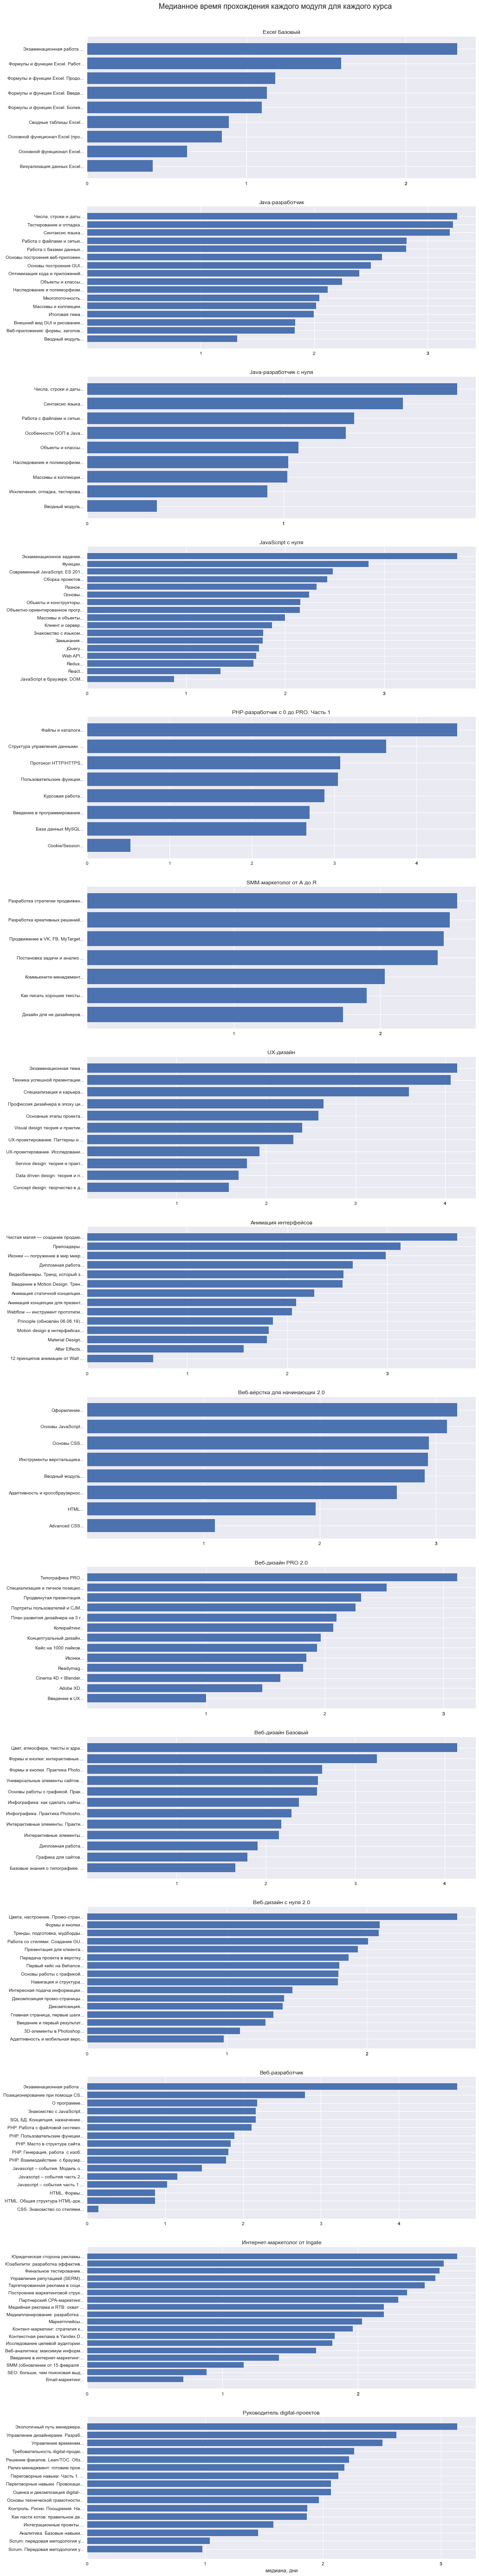

In [1061]:
# Инициализируем график(зададим размеры будущей визуализации, кол-во графиков, их расположение, а так же их размер)
# Получим обьекты класса Figure и Axses
fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(15,100))
# С помощью цикла для каждого графика добавляем данные, выбираем его тип, подписываем название графиков и подписываем оси
for i, num_title in enumerate(range(15)):
    # выбор курса
    data = df_median[df_median['title'] == title_courses[num_title]]
    ax = axs[i]
    # остортируем по убыванию и прологарифмируем данные для лучшей визуализации
    median_data = np.log(data['median'].sort_values(ascending=True))
    # график по всем модулям для каждого курса
    ax.barh(data['module_title'].apply(lambda x: f'{x[:30]}...'), median_data)
    ax.set_title(f'{title_courses[num_title]}')
    ax.set_xticks(list(range(int(median_data.min()), int(median_data.max() + 1), 1)) + [int(median_data.max())])
ax.set_xlabel('медиана, дни')
fig.suptitle('Медианное время прохождения каждого модуля для каждого курса', y=0.89, size=16)
plt.show()

### 3. Медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса, чтобы выяснить сезонность

In [1062]:
# отберем данные
df_month_median = df_time.groupby(['title', 'module_title', 'diff_time'])\
    .agg({'start_date': 'first', 'finish_date': 'last'})\
    .reset_index()
# добавим столбец с номером месяца
df_month_median['month'] = df_month_median.finish_date.dt.month
# сгруппируем данные по месяцам и возьмем медианное значение времени и перевернем таблицу для лучшей визуализации
df_month_median = df_month_median\
    .groupby(['title', 'month'])\
    .agg({'diff_time': 'median'})\
    .unstack(0, fill_value=0)\
    .reset_index()
# преобразуем номера месяцев в названия месяцев
df_month_median['month'] = df_month_median['month']\
    .apply(lambda x: calendar.month_abbr[x])
# выведем данные
df_month_median

month     diff_time                                           \
title       Excel Базовый Java-разработчик Java-разработчик c нуля   
0       Jan      2.099530         5.043720                0.000000   
1       Feb      2.440210         4.999279                0.000000   
2       Mar      2.828454         5.580716                3.749217   
3       Apr      1.883787         9.425019                2.985953   
4       May      2.580251        13.135356                2.723054   
5       Jun      2.591930        12.393044                2.853581   
6       Jul      2.273729         7.685843                2.359845   
7       Aug      2.617921        11.363021                0.000000   
8       Sep      2.300370        11.303799                0.000000   
9       Oct      2.277252        13.084183                0.000000   
10      Nov      2.344001         8.848869                0.000000   
11      Dec      4.274413         3.488152                0.000000   

                                                             \
title JavaScript с нуля PHP-разработчик с 0 до PRO. Часть 1   
0              5.665798                            8.486929   
1              6.715777                           16.828036   
2              5.623883                            7.682569   
3              4.979092                           10.879578   
4              5.724770                           10.002211   
5              6.237427                           14.471407   
6              9.094375                            6.649355   
7              8.386075                           11.188393   
8              9.390133                            5.434254   
9             10.702586                           10.931767   
10             9.843032                           15.989442   
11             7.128055                            9.026679   

                                                                \
title SMM-маркетолог от А до Я  UX-дизайн Анимация интерфейсов   
0                    16.899894  10.277089             6.678521   
1                    11.269117   3.479915             3.763665   
2                    12.093366  10.295103             8.435242   
3                     8.936995  10.033098             4.913691   
4                     8.963095   9.443318            10.773800   
5                     7.949962   7.565208             4.536105   
6                     7.003033   7.739312             5.859811   
7                     0.000000   7.827715             3.512966   
8                     0.000000   9.148559             5.574512   
9                     8.408323  12.805999             4.519626   
10                   16.414139  10.661205             8.285776   
11                   14.594169  10.699688            12.798744   

                                                                            \
title Веб-вёрстка для начинающих 2.0 Веб-дизайн PRO 2.0 Веб-дизайн Базовый   
0                           9.498029          12.398776          11.385625   
1                           9.256196           7.527590           0.862725   
2                           9.132470           7.034747          12.045514   
3                          10.571768           6.872245           8.909646   
4                          10.765032           5.828677           7.787561   
5                           9.504020           5.151774           6.902969   
6                           4.373153           8.026836           9.172034   
7                           5.022978          24.268579          11.012963   
8                           7.037675          24.270177          13.514410   
9                          10.775793          25.468170          22.726165   
10                          9.355517          11.061980          26.302576   
11                          6.819779           9.992051          20.114654   

                                                                           \
title Веб-дизайн с нуля 2.0 Веб-разработчик Инт

### 4. Line-graph с медианным временем выполнения домашней работы по месяцам для каждого курса

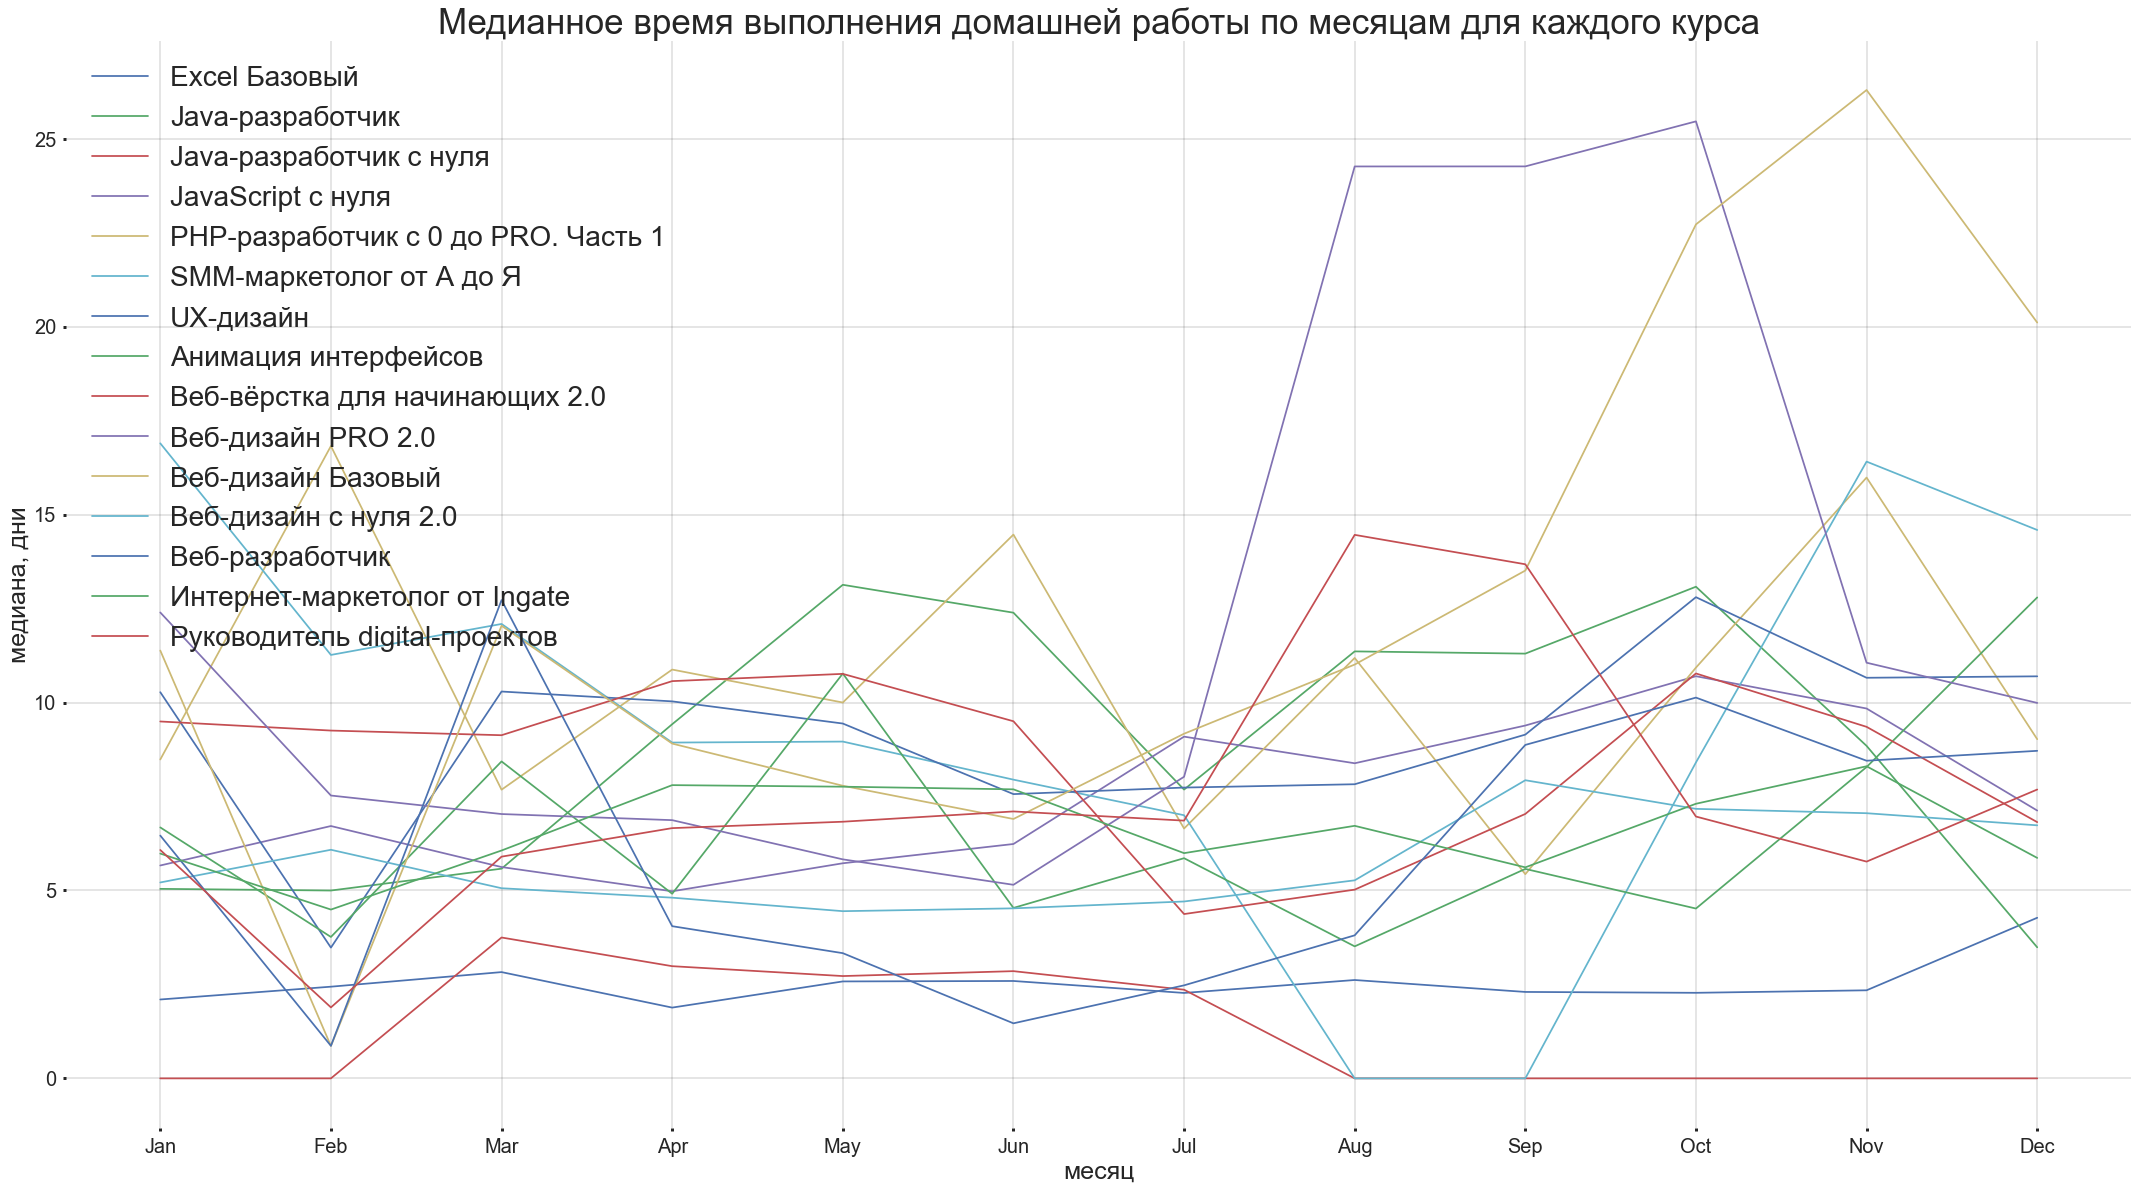

In [1063]:
# инициализируем график(зададим размеры будущей визуализации)
fig, ax = plt.subplots(figsize=(37, 20))

# с помощью цикла для каждого графика добавляем данные, выбираем его тип, подписываем название графика и подписываем оси, 
for i in title_courses:
    ax.plot(df_month_median.month, df_month_median.diff_time[i], label=i)
    ax.set_ylabel('медиана, дни', {'size': 25})
    ax.set_xlabel('месяц', {'size': 25})
    ax.grid(color = 'black', linewidth = .2)
    ax.tick_params(width=3, length=3,  labelsize=20)
# создаем легенду для каждого графика
plt.legend(prop={'size': 28}, loc='upper left')
ax.set_title('Медианное время выполнения домашней работы по месяцам для каждого курса', size=35)
# убираем рамку у графика
plt.box(False)
plt.show()

#### 1.

- **Экзаменационные работы сильно превосходят по времени остальные модули на курсах:**
    - *Excel Базовый*
    - *JavaScript с нуля* 
    - *Веб-разработчик*
  
  Экзаменационная работа обобщает все темы курса и логично, что она занимет много времени у студентов,
  однако, на курсе *Веб-разработчик*, экзаменационная работа в несколько раз, превосходит по времени остальные модули курса, что   возможно свидетельствует либо о слишком высокой степени сложности экзаменационной работы или о слабости всех остальных           модулей. При детальном рассмотрении курса *Веб-разработчик* видно, что он состоит из модулей, по которым уже существуют         отдельные курсы,  что еще раз подверждает наши предыдущие выводы, что курс *Веб-разработчик* был разделен на несколько курсов,   такие как: *PHP-разработчик с 0 до PRO. Часть 1* и *JavaScript с нуля*,  *Java-разработчик с нуля*, *Веб-вёрстка для             начинающих 2.0*.



- **Выделяются по времени некоторые модули на курсах:**
    - *PHP-разработчик с 0 до PRO. Часть 1* 
    - *Анимация интерфейсов*
    - *Веб-дизайн PRO 2.0* 
    - *Веб-дизайн с нуля 2.0*
    - *Руководитель digital-проектов* 
    
    На этих курсах встречаются модули, которые выделяются по продолжительности над остальными модулями. Возможно, они сложны для     понимания студентов и имеет смысл разбить их на несколько модулей, посвятить им больше времени. Если эти темы обьемные, то       возможно имеет смысл создать по ним отдельные курсы. Конкретно, курс содержит три затратных по времени модуля, помимо           экзаменационного модуля еще два: *Техника успешной презентации* и *Специализация и карьера*. Это две темы по которым можно       сделать отдельные курсы.


### 5. Аналитический вывод

**1.**

- **Экзаменационные работы сильно превосходят по времени остальные модули на курсах:**
    - *Excel Базовый*
    - *JavaScript с нуля* 
    - *Веб-разработчик*
  
  Экзаменационная работа обобщает все темы курса и логично, что она занимет много времени у студентов,
  однако, на курсе *Веб-разработчик*, экзаменационная работа в несколько раз, превосходит по времени остальные модули курса, что   возможно свидетельствует либо о слишком высокой степени сложности экзаменационной работы или о слабости всех остальных           модулей. При детальном рассмотрении курса *Веб-разработчик* видно, что он состоит из модулей, по которым уже существуют         отдельные курсы,  что еще раз подверждает наши предыдущие выводы, что курс *Веб-разработчик* был разделен на несколько курсов,   такие как: *PHP-разработчик с 0 до PRO. Часть 1* и *JavaScript с нуля*,  *Java-разработчик с нуля*, *Веб-вёрстка для             начинающих 2.0*.



- **Выделяются по времени некоторые модули на курсах:**
    - *PHP-разработчик с 0 до PRO. Часть 1* 
    - *Анимация интерфейсов*
    - *Веб-дизайн PRO 2.0* 
    - *Веб-дизайн с нуля 2.0*
    - *Руководитель digital-проектов* 
    
    На этих курсах встречаются модули, которые выделяются по продолжительности над остальными модулями. Возможно, они сложны для     понимания студентов и имеет смысл разбить их на несколько модулей, посвятить им больше времени. Если эти темы обьемные, то       возможно имеет смысл создать по ним отдельные курсы. Конкретно, курс содержит три затратных по времени модуля, помимо           экзаменационного модуля еще два: *Техника успешной презентации* и *Специализация и карьера*. Это две темы по которым можно       сделать отдельные курсы.
    
**2.**

- Видны пики роста медианного времени выполнения домашних заданий летом, начиная с июля и снижением времени к февралю, что скорее всего связано с отпусками. Наибольшие задержки в сдачах домашних заданий в летний период наблюдается на курсах: *Веб-дизайн PRO 2.0*, *Веб-дизайн Базовый*. Что касается *Веб-дизайн PRO 2.0*, то высокое медианное время может быть связанно с высокой нагрузкой преподавателей на этом курсе, что еще раз свидетельствует о необходимости обратить внимание на этот курс. 
- Курс *Веб-дизайн Базовый* имеет практически нулевой спрос, уже в течении чуть меньше года, но в то же время он имеет самые высокие затраты времени выполнения домашних заданий в летний период. Поэтому, есть причины отнести курс *Веб-дизайн Базовый* - к проблемным.

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно 
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

### 1. Расчет конверсии перехода студентов из одного модуля в другой на каждом курсе

In [1064]:
# отберем модули со сданными или начатыми домашними заданиями 
df_conv = data_df[(data_df['is_homework']==True)]
# отбермем данные за первые начальные и последние конечные даты
df_conv = df_conv\
    .groupby(['title', 'module_title', 'student_id', 'module_number', 'status', 'field'])\
    .agg({'start_date': 'first', 'finish_date': 'last'})\
    .reset_index()
# количество студентов начавших ДЗ по всем модулям
df_conv_start = df_conv\
    .groupby(['title', 'module_number', 'module_title', 'field'])['student_id']\
    .count()\
    .reset_index(name='student_start')
# количество студентов сдавших ДЗ по всем модулям
df_conv_done = df_conv[df_conv['status'] == 'done']\
    .groupby(['title', 'module_number', 'module_title', 'field'])['student_id']\
    .count()\
    .reset_index(name='student_done')

In [1065]:
# есть модуль в котором нет данных о студентах, которые его закончили, поэтому удалим его
# соединим стартовый и финишный датафреймы
df_coversion = pd.merge(df_conv_start, df_conv_done)

# создадим список с количеством студентов завершивших предыдущий модуль
student_count_list = df_coversion['student_done'] - df_coversion.groupby('title')['student_done']\
                                     .diff()\
                                     .fillna(np.NaN)
# посчитаем отношение кол-ва студентов начавших ДЗ к кол-ву студентов закочавших последнее ДЗ в предыдущем модуле
df_coversion['conversion'] = np.round(df_coversion['student_start']/
                                     student_count_list, 3)\
                                     .fillna(0)                                 
# # выведем данные
df_coversion.head()

title  module_number  \
0  Excel Базовый              1   
1  Excel Базовый              2   
2  Excel Базовый              3   
3  Excel Базовый              4   
4  Excel Базовый              5   

                                        module_title     field  student_start  \
0                          Основной функционал Excel  Business            518   
1            Основной функционал Excel (продолжение)  Business            434   
2                  Формулы и функции Excel. Введение  Business            398   
3  Формулы и функции Excel. Продолжаем работать с...  Business            345   
4     Формулы и функции Excel. Более сложные формулы  Business            298   

   student_done  conversion  
0           458       0.000  
1           406       0.948  
2           387       0.980  
3           303       0.891  
4           270       0.983

### 2. Bar-chart отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе

In [1066]:
# так как имеются одинаковые названия модулей, добавим к названию модуля название курса
df_coversion.module_title = df_coversion.module_title+' '+ df_coversion.title

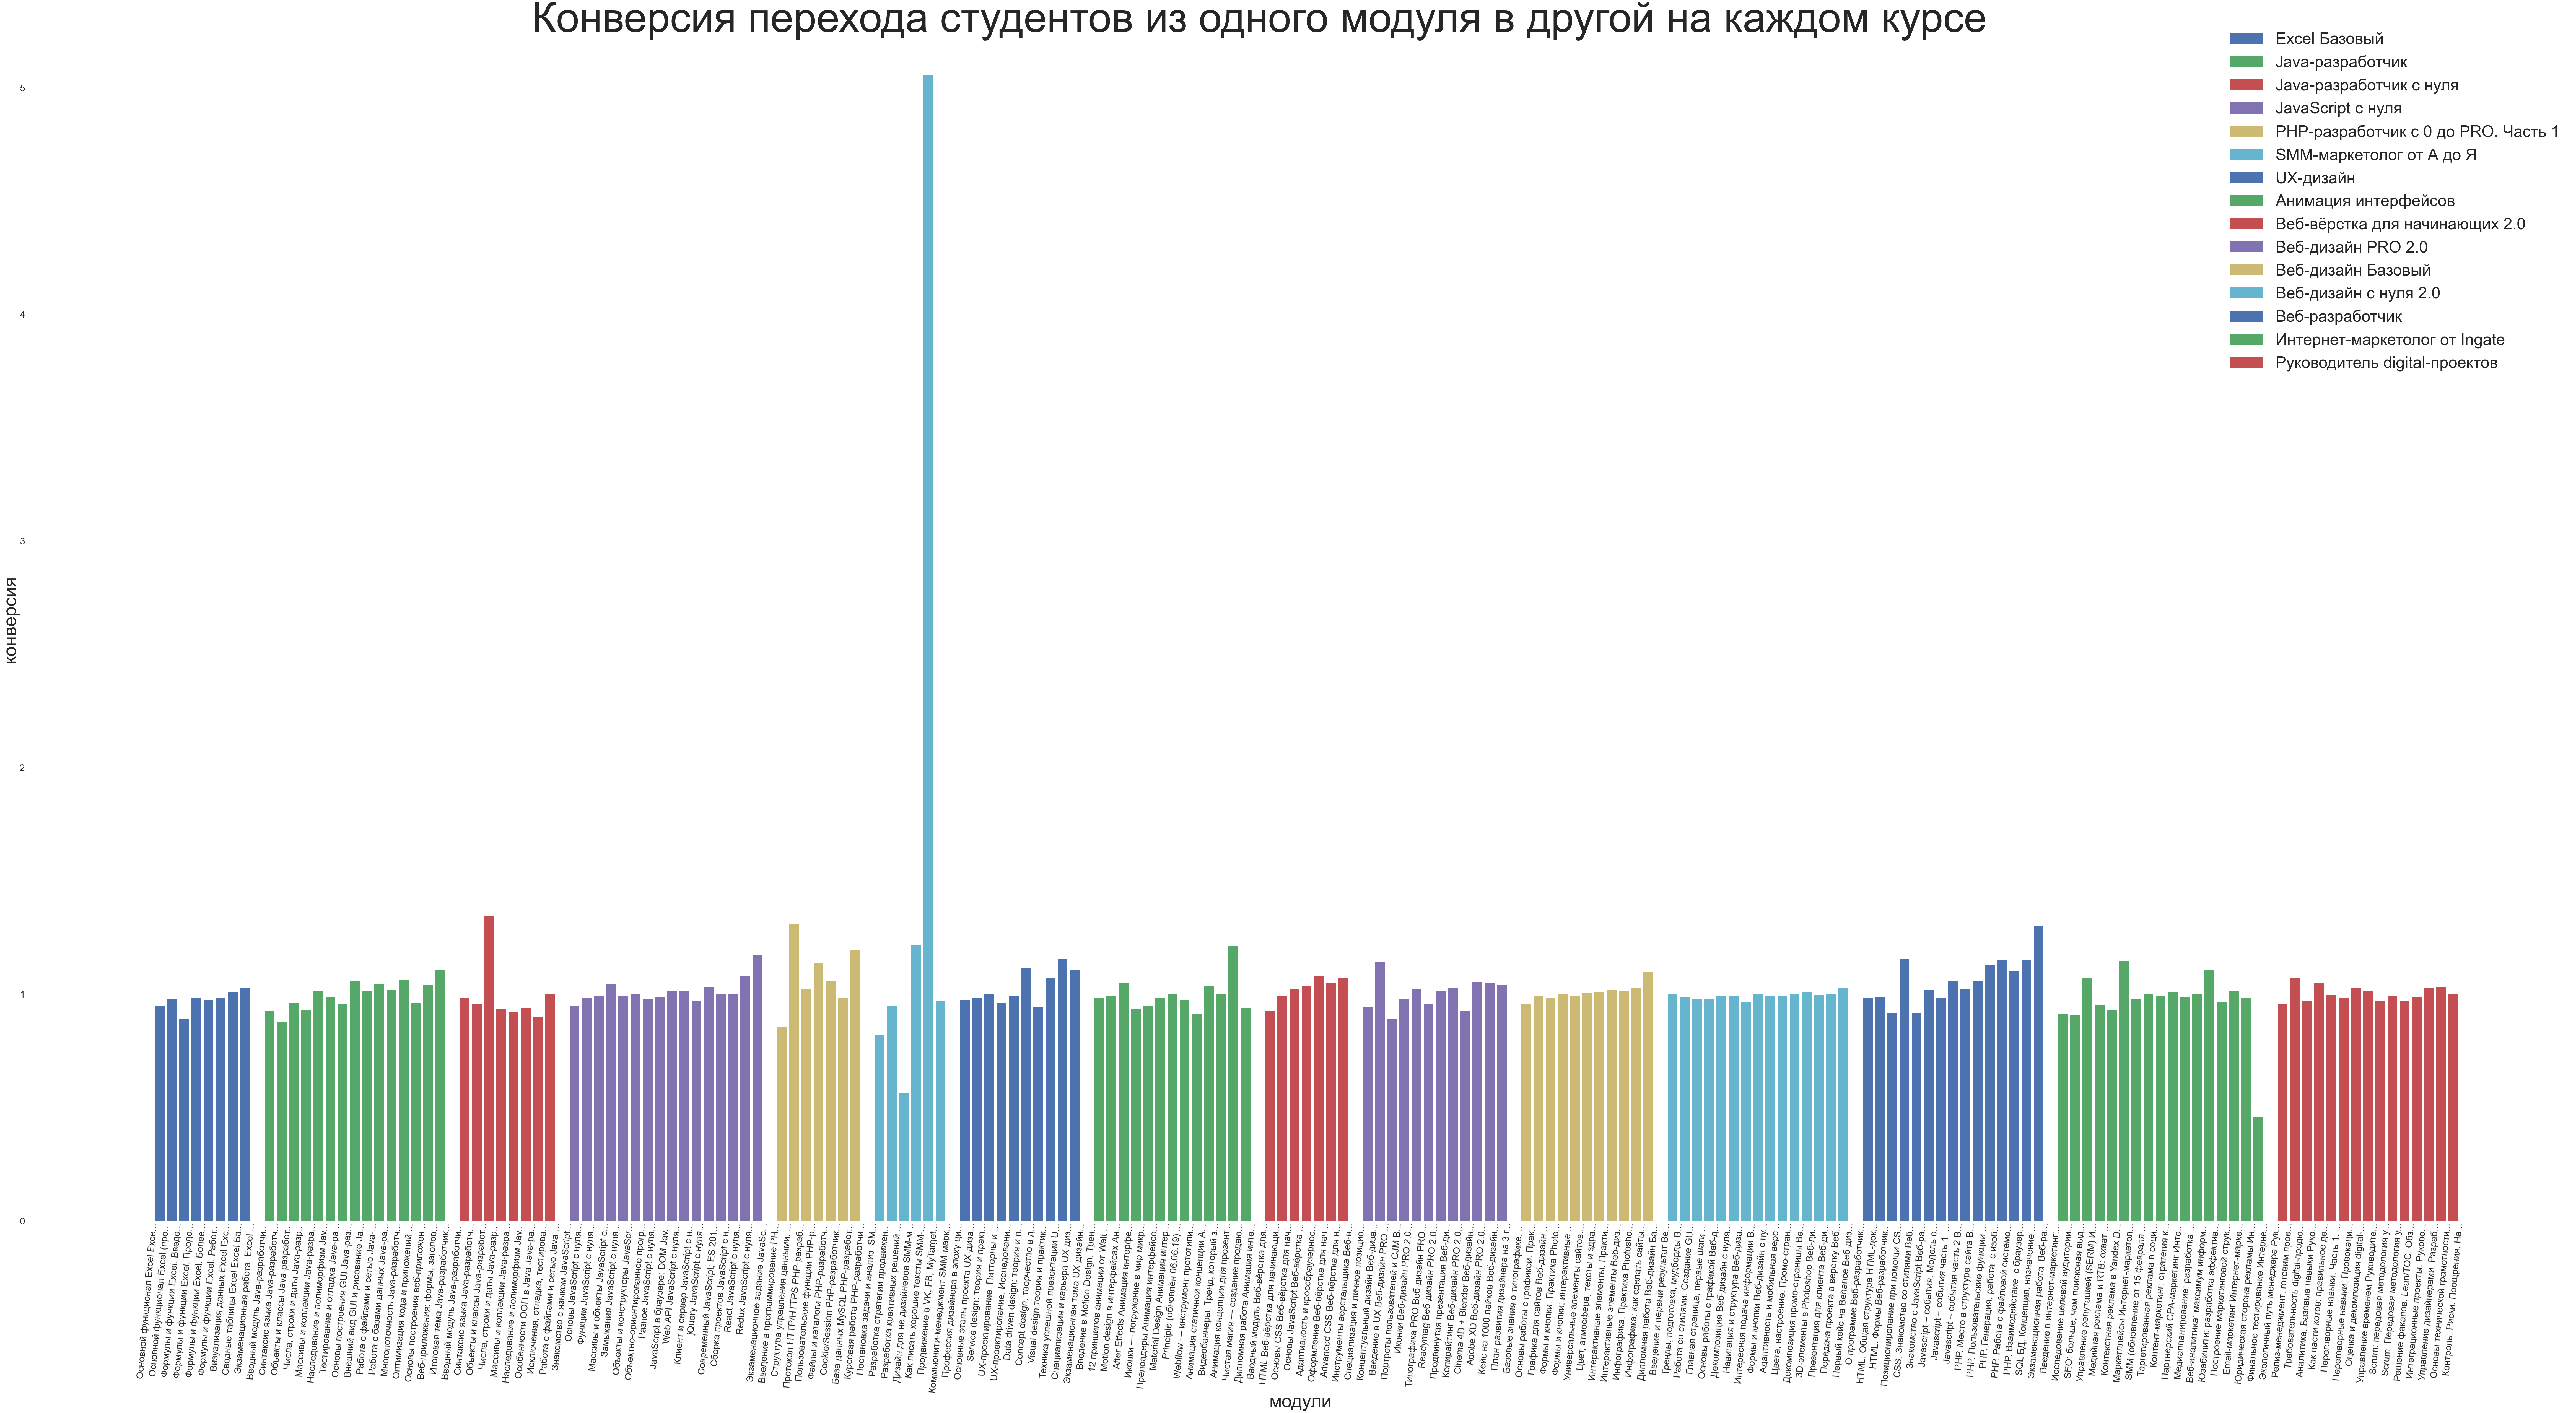

In [1067]:
# Инициализируем график(зададим размеры будущей визуализации, кол-во графиков, их расположение, а так же их размер)
# Получим обьекты класса Figure и Axses
fig, ax = plt.subplots(figsize=(165,80))
# С помощью цикла для каждого графика добавляем данные, выбираем его тип, подписываем название графиков и подписываем оси
for i in df_coversion.title.unique():
    # выбор курса
    data = df_coversion[df_coversion['title']==i]
    ax.bar(data.module_title, data.conversion, label=i)
# сократим длинные названия модулей и повернем их
ax.set_xticklabels(df_coversion.module_title.apply(lambda x: f'{x[:30]}...'), rotation=85)

plt.tick_params(labelsize=34)
# легенда
plt.legend(prop={'size': 58}, loc='upper right')

plt.xlabel('модули', size=66)
plt.ylabel('конверсия', size=66)
fig.suptitle('Конверсия перехода студентов из одного модуля в другой на каждом курсе', y=0.89, size=150)
# убираем рамку у графика
plt.box(False)

plt.show()

### 3. Bar-charts горизонтальные , отражающие конверсию перехода студентов из одного модуля в другой на каждом курсе

In [1068]:
# зададим цвета сфер курсов
colors = {'Marketing':'blue', 'Design':'orange', 'Development': 'green', 'Business': 'brown'}
# добавим к названию модуля его номер
df_coversion.module_title = df_coversion.module_number\
    .astype(str)+' '+ df_coversion.module_title\
    .apply(lambda x: f'{x[:30]}...')

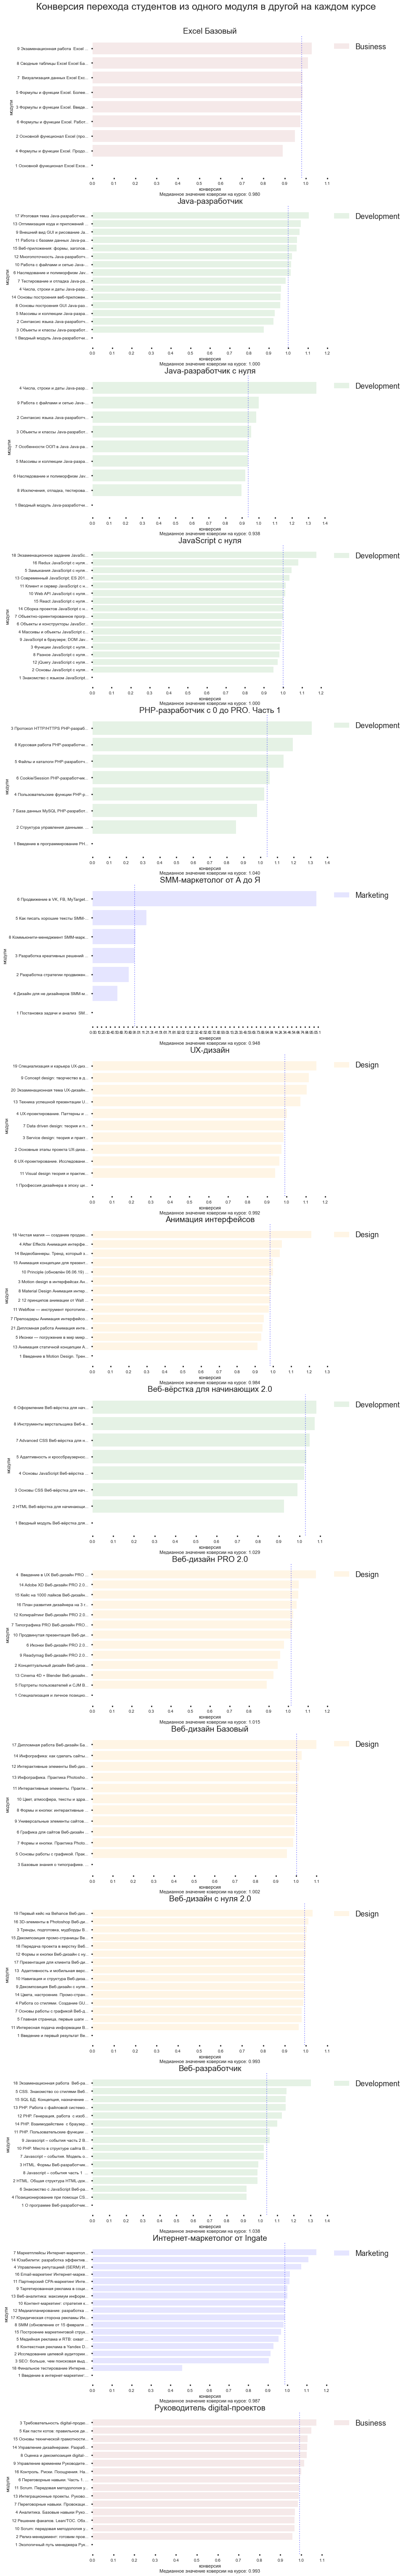

In [1069]:
# Инициализируем график(зададим размеры будущей визуализации, кол-во графиков, их расположение, а так же их размер)
# Получим обьекты класса Figure и Axses
fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(10,110))
# С помощью цикла для каждого графика добавляем данные, выбираем его тип, подписываем название графиков и подписываем оси
for i, num_title in enumerate(range(15)):
    ax = axs[i]
    # выбор курса
    data = df_coversion[df_coversion['title'] == df_coversion.title\
                        .unique()[num_title]]\
                        .sort_values('conversion', ascending=True)
    # график по всем модулям для каждого курса
    ax.barh(data.module_title, data.conversion,
            color=colors[data.field.unique()[0]], alpha=0.1, label=data.field.unique()[0])
    ax.set_title(f'{df_coversion.title.unique()[num_title]}', size=19)
    ax.tick_params(width=3, length=3,  labelsize=10)
    ax.set_xlabel(f'конверсия\n'
    f'Медианное значение коверсии на курсе: {data.conversion.median():.3f}')
    ax.set_ylabel('модули')
    ax.set_xticks(list(np.arange(float(data.conversion.min()), float(data.conversion.max()+0.1), 0.1)))
    # уберем цвет фона
    ax.patch.set_facecolor(None)
    ax.patch.set_alpha(0.0)
    # зададим размер и размещение легенды
    ax.legend(prop={'size': 18}, bbox_to_anchor=(1, 1))
    # Создадим линию медианы, зададим ее толщину, цвет, прозрачность и вид
    ax.axvline(x=data.conversion.median(), linewidth=2, color='b', alpha=0.4, ls=':')
fig.suptitle('Конверсия перехода студентов из одного модуля в другой на каждом курсе', y=0.89, size=23)
plt.show()

### 4. Аналитический вывод

**1.** 
- Сразу бросается в глаза аномальный пик на курсе *SMM-маркетолог от А до Я*. Модуль *Продвижение в VK, FB, MyTarget* имеет огромную конверсию(**>5**). При детальном рассмотрении видно, что студенты 'перепрыгивают' через модули 4 и 5 и идут на модуль *Продвижение в VK, FB, MyTarget*. Это скорее всего связано с тем, что вторым модулем курса идет *Разработка стратегии продвижения в Social Media* и дальнейший переход на модуль *Продвижение в VK, FB, MyTarget* является логичным решением. Имеет смысл перенести этот модуль с 6-ой позиции на 3-ю.


**2.** 
- Курсы с самой высокой конверсией: 
 - *PHP-разработчик с 0 до PRO. Часть 1*(**1.040**)
 - *Веб-разработчик*(**1.038**)
 - *Веб-вёрстка для начинающих 2.0*(**1.029**)
 
- Курсы с самой низкой конверсией: 
 - *SMM-маркетолог от А до Я*(**0.948**)
 - *Анимация интерфейсов*(**0.984**)
 - *Интернет-маркетолог от Ingate*(**0.987**)

## 5. Метрика успеваемости 

    &nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

    Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

Разделим студентов с низкой успеваемостью(отсутствие мотивации, медленное восприятие информации, совмещающих учебу и работу), студентов, для которых получаемая информация курса слишком сложна и студентов, у которых совсем пропала активность на курсе в течении длительного времени.

### 1. Отстающие студенты

Для того, чтобы определить отстающих студентов, найдем тех, которые имеют время прохождения модулей курса выше медианного времени(такими студентами будем считать тех, кто имеет более 3-х модулей со временем выше медианного)

In [1070]:
# отберем данные временных статистик модулей
median_df = df_median[['module_title', 'median', 'max']]
# добавим к названиям модулей названия курсов во избежании повторений
median_df.module_title = df_median.module_title+' '+ df_median.title
# выведем данные
median_df

module_title  median      max
0              Визуализация данных Excel Excel Базовый   4.922  174.839
1              Основной функционал Excel Excel Базовый   2.331  183.749
2    Основной функционал Excel (продолжение) Excel ...   1.873  184.269
3                  Сводные таблицы Excel Excel Базовый   2.993  239.226
4    Формулы и функции Excel. Более сложные формулы...   3.086  175.549
..                                                 ...     ...      ...
185  Решение факапов. Lean/TOC. Обзор. Руководитель...   7.928  211.568
186  Требовательность digital-продюсера Руководител...   7.912  396.529
187  Управление временем Руководитель digital-проектов   4.265  163.682
188  Управление дизайнерами. Разработка дизайна по ...   8.886  199.136
189  Экологичный путь менеджера Руководитель digita...   2.660  245.586

[190 rows x 3 columns]

In [1088]:
# отберем модули, в которых есть выполненое домашнее задание
df_students_problem = data_df[(data_df['is_homework']==True)]
# изменим тип данных колонок с датами начала и конца прохождения модуля студентом
df_students_problem['start_date'] = pd.to_datetime(df_students_problem['start_date'], errors = 'coerce')
df_students_problem['finish_date'] = pd.to_datetime(df_students_problem['finish_date'], errors = 'coerce')
df_students_problem.dropna(inplace=True)
# сгруппируем данные по дате начала выполнения первого ДЗ и даты окончания выполнения последнего ДЗ модуля
df_students_problem = df_students_problem\
    .groupby(['student_id', 'module_title', 'title', 'module_number'])\
    .agg({'start_date': 'first', 'finish_date':'last'}).reset_index()
# рассчитаем время прохождения каждого модуля студентом
df_students_problem['diff_time'] =  np.round((df_students_problem['finish_date'] - df_students_problem['start_date'])\
                                    /np.timedelta64 ( 1 , 'D'), 3)
# отберем данные без ошибок в датах
df_students_problem = df_students_problem[df_students_problem['diff_time'] > 0]
# так как, некоторые модули разных крсов имеют одинаковые названия, добавим к текущим названиям модуле названия курсов
df_students_problem.module_title = df_students_problem.module_title+' '+ df_students_problem.title
#  соединим данные с информацией о студентах и данные с временными статистиками выполнения модулей
df_students_problem = df_students_problem.merge(median_df)
# отберем студентов имеющих времена выполнения модулей выше медианного
df_stud_prob_median = df_students_problem[(df_students_problem['diff_time'] > df_students_problem['median']
                                         )&(
                                         df_students_problem['diff_time'] < df_students_problem['max'])]
# выведем данные
df_stud_prob_median

student_id  \
0      000333b6aa5706c53f4d2ec24c7a128d   
2      01868d79f6359e02cb39b1a00a5cd63d   
5      0326e468ce1459b44df387943312e25a   
7      08a55d1ec1ee62e0cf1e1fa0f2891337   
9      0b624a1a1a0afadc0a461d14e94c30b4   
...                                 ...   
42270  e2f683ed520e28c262771b9b7391f74a   
42273  857a12089049fdec73352670cd4a952c   
42278  b316639ee6038507c34b7692db398e9e   
42279  bac48238a13670ade2fb3c13efd208a1   
42280  c5f085d084d63019f2eb5aaa5f1e2b7f   

                                            module_title  \
0      Постановка задачи и анализ  SMM-маркетолог от ...   
2      Постановка задачи и анализ  SMM-маркетолог от ...   
5      Постановка задачи и анализ  SMM-маркетолог от ...   
7      Постановка задачи и анализ  SMM-маркетолог от ...   
9      Постановка задачи и анализ  SMM-маркетолог от ...   
...                                                  ...   
42270          Экзаменационное задание JavaScript с нуля   
42273  Курсовая работа PHP-разработчик с 0 до PRO. Ча...   
42278  Курсовая работа PHP-разработчик с 0 до PRO. Ча...   
42279  Курсовая работа PHP-разработчик с 0 до PRO. Ча...   
42280  Курсовая работа PHP-разработчик с 0 до PRO. Ча...   

                                     title  module_number  \
0                 SMM-маркетолог от А до Я              1   
2                 SMM-маркетолог от А до Я              1   
5                 SMM-маркетолог от А до Я              1   
7                 SMM-маркетолог от А до Я              1   
9                 SMM-маркетолог от А до Я              1   
...                                    ...            ...   
42270                    JavaScript с нуля             18   
42273  PHP-разработчик с 0 до PRO. Часть 1              8   
42278  PHP-разработчик с 0 до PRO. Часть 1              8   
42279  PHP-разработчик с 0 до PRO. Часть 1              8   
42280  PHP-разработчик с 0 до PRO. Часть 1              8   

                            start_date                      finish_date  \
0     2019-05-31 15:45:43.373743+00:00 2019-06-18 07:07:08.392327+00:00   
2     2019-04-23 19:03:41.038771+00:00 2019-05-02 09:53:09.501052+00:00   
5     2018-10-28 12:16:57.492864+00:00 2019-01-13 16:20:19.040838+00:00   
7     2019-06-23 10:41:17.838679+00:00 2019-07-04 06:28:54.162658+00:00   
9     2019-04-21 06:13:28.459002+00:00 2019-05-01 09:31:18.761488+00:00   
...                                ...                              ...   
42270 2018-11-26 22:35:00.404356+00:00 2019-02-07 07:12:42.304227+00:00   
42273 2018-08-01 16:12:26.341765+00:00 2018-12-17 14:44:22.807764+00:00   
42278 2018-11-20 17:43:28.881223+00:00 2019-04-22 11:22:40.627584+00:00   
42279 2018-10-04 08:17:58.555367+00:00 2019-01-08 14:48:12.944627+00:00   
42280 2019-01-09 08:27:38.510040+00:00 2019-05-07 08:30:25.749374+00:00   

       diff_time  median      max  
0         17.640   7.609  209.795  
2          8.618   7.609  209.795  
5         77.169   7.609  209.795  
7         10.825   7.609  209.795  
9         10.137   7.609  209.795  
...          ...     ...      ...  
42270     72.360  41.971   92.498  
42273    137.939  89.469  187.839  
42278    152.736  89.469  187.839  
42279     96.271  89.469  187.839  
42280    118.002  89.469  187.839  

[21008 rows x 9 columns]

In [1089]:
# получим id студентов, у которых имеются модули с временем прохождения выше медианного
df_prob_median_count = df_stud_prob_median\
    .groupby(['student_id'])['module_title']\
    .count().reset_index(name='modules_count')\
    .sort_values('modules_count', ascending=False)
# получим id студентов, имеющих больше 1-ого модуля, с временем прохождения выше медианного
df_prob_median_count = df_prob_median_count[df_prob_median_count['modules_count']>3]\
    .reset_index(drop=True)
# выведем данные
df_prob_median_count

student_id  modules_count
0     ce87ff48d886feb4127db3609e7a3eaa             29
1     bdf7f35d629be4106773073b8bd21eb6             28
2     f1ee750ba369f122982ef490869a1617             27
3     8a1dd13368ac23f07d4fe56e6222a8b4             26
4     f637b158d5720f6e50da87ac620a9c82             26
...                                ...            ...
1993  1ccd100e360f7d6c7c06462bd63289cc              4
1994  42e3c3699e6f1e385a20faec6ce15d56              4
1995  83424673540c50160e5d4c8aef3c04f7              4
1996  e8c36563defd9cdb4b6938db78833519              4
1997  8395f966de3fa2e9e5e3ef8a0abb8d07              4

[1998 rows x 2 columns]

### 2. Сильно отстающие студенты

Определим сильно отстающих студентов, которые имеют максимальное время прохождения модулей курса(такими студентами будем считать тех, кто имеет более 1-ого модуля с максимальным временем)

In [1090]:
# отберем студентов имеющих максимальные времена выполнения модулей
df_stud_prob_max = df_students_problem[df_students_problem['diff_time'] == df_students_problem['max']] 
# сгруппируем студентов по количеству модулей
df_prob_max_count = df_stud_prob_max\
    .groupby(['student_id'])['module_title']\
    .count().reset_index(name='modules_count')\
    .sort_values('modules_count', ascending=False)
# получим id студентов имеющих больше 1-ого максимального времени прохождения модуля
df_prob_max_count = df_prob_max_count[df_prob_max_count['modules_count']>1]\
    .reset_index(drop=True)
# выведем данные
df_prob_max_count

student_id  modules_count
0   bad9aa9ca2cbbd943f1c7a22cf3eb10f              8
1   cc7186542f9d3ea846a3e993b2461177              4
2   94cfaf0314accf69f2bdfb4d9a08b7a9              3
3   aa60999058ab712153b09abf96663853              3
4   9f9d6049d99134318a028cb0c4c78f8a              3
5   022ea4bc33f072fbb1ffd2fae9dd46fa              3
6   7931e8decbc23d3915c81d4b6c7b0beb              3
7   58982b4f04ebe21c46347a1e8ebd8321              2
8   90673ae513f22cd8c83c0019c3883d85              2
9   1bc214ab65648c82ec61928783b7699b              2
10  48c5718121b5b79b134e55b8b31815ff              2
11  acf0d879acb93a75e97a2cee5996ee49              2
12  add5e7e4ada5e6fcc84658d8c717e1cd              2
13  aea184c1176260e413ccbf035affc626              2
14  8661e5712b6d92685e7e6baac8345640              2
15  3116713ba1faa82bbede521fd0d16b5b              2
16  a91834d936dff4b9c4227cd4d416d8c1              2
17  b4ec9580c9415a0efab4b16187a754ca              2
18  04584b32f6fa39b3cbf59c573e59c303              2
19  f7fa9873d45427439f9e1e08e27cd0e4              2
20  e0aade08233b755666d21512fe3e944c              2

### 3. Студенты, для которых курс является неподьемным.

Для того, чтобы определить студентов, для которых информация курса слишком сложна, определим тех студентов, у которых имеются несданные ДЗ модуля или имеются ошибки, в настоящий момент, при этом текущее потраченное время выше медианного (такими студентами будем считать тех, кто имеет более 2-х проблемных модулей).

In [1074]:
# отберем уроки с ДЗ
df_stud_backward = data_df[(data_df['is_homework']==True)]
# изменим тип данных колонок с датами начала и конца прохождения модуля студентом
df_stud_backward['start_date'] = pd.to_datetime(df_stud_backward['start_date'])


# отберем студентов с несданными ДЗ по настоящее время
df_stud_backward = df_stud_backward[df_stud_backward['finish_date'].isnull()]

# заменим пропуски к колонке финишная дата на текущую дату
df_stud_backward['finish_date'].fillna(pd.to_datetime('2019-07-31 00:00:00+00:00'), inplace=True)

# оcтавим только дату начала выполнения первого ДЗ в модуле
df_stud_backward = df_stud_backward\
    .groupby(['student_id', 'title', 'module_title', 'module_number', 'status'])\
    .agg({'start_date': 'first', 'finish_date': 'last'})\
    .reset_index()

# рассчитаем текущее время выполнения домашнего задания
df_stud_backward['diff_time'] =  np.round(
                                         (df_stud_backward['finish_date'] - df_stud_backward['start_date'])\
                                         /np.timedelta64 ( 1 , 'D'), 3
                                         )

# так как, некоторые модули разных крсов имеют одинаковые названия, добавим к текущим названиям модуле названия курсов
df_stud_backward.module_title = df_stud_backward.module_title+' '+ df_stud_backward.title
#  соединим данные с информацией о студентах и данные с временными статистиками выполнения модулей
df_prob_students = df_stud_backward.merge(median_df)
# отберем студентов, у которых текущее время выполнения ДЗ превышает медианное время по модулю
df_stud_backward = df_prob_students[(df_prob_students['diff_time'] > df_prob_students['median']
                                    )&(
                                     df_prob_students['diff_time'] <= df_prob_students['max'])] 

# оставим только первые 3 модуля, чтоб увидеть проблемы в самом начале
df_stud_backward = df_stud_backward[df_stud_backward['module_number'] < 4]

# выведем данные
df_stud_backward.head()

student_id                     title  \
44  000333b6aa5706c53f4d2ec24c7a128d  SMM-маркетолог от А до Я   
48  1285a78a4b67fb34de21269edb78f18f  SMM-маркетолог от А до Я   
49  15d8628c2866e3a0a178f2686b243c41  SMM-маркетолог от А до Я   
55  28c4c6a2837b665e4fe6de827ae5812b  SMM-маркетолог от А до Я   
56  2bdd99ff817babb987ef5f6802a87076  SMM-маркетолог от А до Я   

                                         module_title  module_number status  \
44  Разработка креативных решений SMM-маркетолог о...              3   fail   
48  Разработка креативных решений SMM-маркетолог о...              3  start   
49  Разработка креативных решений SMM-маркетолог о...              3  start   
55  Разработка креативных решений SMM-маркетолог о...              3  start   
56  Разработка креативных решений SMM-маркетолог о...              3   fail   

                         start_date               finish_date  diff_time  \
44 2019-07-05 18:11:27.361533+00:00 2019-07-31 00:00:00+00:00     25.242   
48 2019-06-28 11:00:45.063863+00:00 2019-07-31 00:00:00+00:00     32.541   
49 2019-04-25 10:42:48.740103+00:00 2019-07-31 00:00:00+00:00     96.554   
55 2019-06-13 19:21:03.260253+00:00 2019-07-31 00:00:00+00:00     47.194   
56 2019-07-05 06:51:21.004691+00:00 2019-07-31 00:00:00+00:00     25.714   

    median      max  
44  11.386  102.335  
48  11.386  102.335  
49  11.386  102.335  
55  11.386  102.335  
56  11.386  102.335

In [1075]:
# Студенты, для которых обучение слишком сложное
list_problem_students = df_stud_backward.student_id.unique()
# выведем список студентов
list_problem_students = pd.DataFrame({'problem_student_id': list_problem_students})
# выведем данные
list_problem_students

problem_student_id
0     000333b6aa5706c53f4d2ec24c7a128d
1     1285a78a4b67fb34de21269edb78f18f
2     15d8628c2866e3a0a178f2686b243c41
3     28c4c6a2837b665e4fe6de827ae5812b
4     2bdd99ff817babb987ef5f6802a87076
...                                ...
3218  8abafad5b6cb90ae56715ae7d5c2b51d
3219  b2c67c377f80ff7841848dd8b755bce1
3220  cb80779cfdc53f9e8304ecf3ca22ea77
3221  e26a88a0e959090c5fb6d332d625b128
3222  e63d3f61f3b0347b06f027962ccbfe96

[3223 rows x 1 columns]

#### 3.1 Модули, с которыми студенты имеют трудности

In [1091]:
# Модули, на которых есть студенты с проблемами в обучении
students_problem = df_stud_backward.merge(list_problem_module)
df_modules_prob = students_problem.groupby(['title', 'module_title', 'module_number'])['student_id']\
    .count()\
    .reset_index(name='prob_students_count')\
    .sort_values('prob_students_count', ascending=False)
# выделим необходимые данные по проблемным модулям
df_modules_prob[['module_title', 'title', 'module_number', 'prob_students_count']]
# выделим необходимые данные количества студентов по курсам
df_student_count = student_count[['title', 'student_count']]
# соединим данные
df_prob_persent = df_modules_prob.merge(df_student_count)
# рассчитаем процент проблемных студентов на курсе для сравнения модулей между собой
df_prob_persent['persent_prob_stud'] = np.round(
                                               (df_prob_persent['prob_students_count']
                                                /df_prob_persent['student_count'])*100, 1
                                               )
# выведем данные
df_prob_persent = df_prob_persent.sort_values('persent_prob_stud', ascending=False)
# выведем данные
df_prob_persent.head()

title  \
0    Интернет-маркетолог от Ingate   
22        SMM-маркетолог от А до Я   
13   Руководитель digital-проектов   
3   Веб-вёрстка для начинающих 2.0   
25         Java-разработчик c нуля   

                                         module_title  module_number  \
0   Исследование целевой аудитории: портретировани...              2   
22  Постановка задачи и анализ  SMM-маркетолог от ...              1   
13  Релиз-менеджмент: готовим проекты к запуску Ру...              2   
3           Основы CSS Веб-вёрстка для начинающих 2.0              3   
25             Вводный модуль Java-разработчик c нуля              1   

    prob_students_count  student_count  persent_prob_stud  
0                   519           2168               23.9  
22                  105            506               20.8  
13                  115            685               16.8  
3                   306           2004               15.3  
25                   87            581               15.0

#### 3.2 Курсы, с которыми студенты имеют трудности

In [1077]:
# Количество студентов, столкнувшихся с трудностями в обучении на каждом курсе
df_courses_prob = df_prob_persent.groupby(['title'])['prob_students_count']\
    .sum()\
    .reset_index(name='prob_students_count')\
    .sort_values('prob_students_count', ascending=False)
# выведем курсы
df_courses_prob = df_courses_prob.merge(df_student_count)
df_courses_prob['persent_prob_stud'] = np.round(
                                               (df_courses_prob['prob_students_count']
                                                /df_courses_prob['student_count'])*100, 1
                                               )
# выведем отсортированные данные
df_courses_prob.sort_values('persent_prob_stud', ascending=False)

title  prob_students_count  student_count  \
0         Интернет-маркетолог от Ingate                  971           2168   
10             SMM-маркетолог от А до Я                  178            506   
7               Java-разработчик c нуля                  183            581   
1        Веб-вёрстка для начинающих 2.0                  594           2004   
8         Руководитель digital-проектов                  182            685   
6   PHP-разработчик с 0 до PRO. Часть 1                  216            854   
9                      Java-разработчик                  181            763   
5                     JavaScript с нуля                  216            966   
4                             UX-дизайн                  253           1151   
11                 Анимация интерфейсов                  122            598   
2                 Веб-дизайн с нуля 2.0                  348           2014   
3                    Веб-дизайн PRO 2.0                  263           1711   
12                        Excel Базовый                   81            782   
13                      Веб-разработчик                   22            628   
14                   Веб-дизайн Базовый                   17            518   

    persent_prob_stud  
0                44.8  
10               35.2  
7                31.5  
1                29.6  
8                26.6  
6                25.3  
9                23.7  
5                22.4  
4                22.0  
11               20.4  
2                17.3  
3                15.4  
12               10.4  
13                3.5  
14                3.3

### 4. Студенты, которые вероятно, бросили обучение

Студенты, которые перестали учиться, это вероятно те студенты, у которых текущее время выполнения ДЗ первых модулей, больше максимального времени, среди сдавших студентов.

In [1078]:
# отберем студентов, у которых время вывполнения текущих модулей, выше текущего максимального времени по модулю
drop_students = df_prob_students[(df_prob_students['diff_time'] > df_prob_students['max']
                 )&(
                df_prob_students['status'].isin(['fail', 'start']))]\
                                ['student_id'].unique()
# студенты, которые аномально долго выполняют текущие модули
drop_students = pd.DataFrame({'drop_student_id': drop_students})
# выведем данные
drop_students

drop_student_id
0     0d7e21b7e7fd96403796a8dae0b5e1b4
1     3a3ed4952da7cdcb391ef94fb8f95591
2     59fa0486daa86d553abfbfb8b3b067e5
3     82a5a0466184a32867045a6359126cb8
4     9724eea9637d04b9e99d83efacd622c6
...                                ...
1718  674c2120c92abaf12e361ab7a1a0aea0
1719  97683e1b8d0c30cffc95fe9534fba5aa
1720  a4eae6964e27111932b9d1b360b6ee3e
1721  da3f559760f5d70db91742a1a1ab27cb
1722  fb10649db552c5f451bea45ed754d428

[1723 rows x 1 columns]

### 5. Выводы

- Всего студентов имеющих проблемы с обучением: **6965** человек(**44**% от общего числа студентов).

- Всего отстающих студентов найдено: **1998** человек. Самыми отстающими из них являются студенты: 

 - *bdf7f35d629be4106773073b8bd21eb6* (**28** модулей)  
 - *ce87ff48d886feb4127db3609e7a3eaa* (**29** модулей).

- Сильно отстающих студентов, найдено **21** человек. Самыми отстающими из них являются студенты:
 - *bad9aa9ca2cbbd943f1c7a22cf3eb10f* (**8** модулей) 
 - *cc7186542f9d3ea846a3e993b2461177* (**4** модуля)

   Еще **5**-ть студентов имеют по **3** макимальных времени проходения модулей и **14** студентов имеют по **2** максимальных времени.

- Количество студентов, для которых курсы оказались неподьемными: **3223** человек(**20**% от общего числа студентов).

- Количество студентов, которые вероятно, перестали учиться - **1723** человека(**11**% от общего числа студентов).

- Модули, которые вызывают больше всего проблем у студентов имеющих трудности: 
 - *Исследование целевой аудитории...*, Курс: *Интернет-маркетолог от Ingate* - **519** студентов, что составляет **24**% от общего числа студентов на курсе.
 - *Постановка задачи и анализ SMM-маркетолог...*, Курс: *SMM-маркетолог от А до Я* - **105** студентов, что составляет **21**% от общего числа студентов на курсе.

- Курсы, на которых числиться наибольшее количество студентов имеющих сложности с обучением:
 - *Интернет-маркетолог от Ingate* - **971** студентов, что составляет **45**% от общего числа студентов на курсе.
 - *SMM-маркетолог от А до Я* - **178** студентов, что составляет **35**% от общего числа студентов на курсе.

- Курсы по маркетингу занимают первое и второе место по числу студентов, которые переоценили свои силы.
Суммарное количество студентов с проблемами на маркетинговых курсах - **1149** человек(**7**% от общего числа студентов).
Возможно, курсы по маркетингу привлекают своей популярностью много людей, которые могут недооценивать обьем и сложность информации, из за кажущейся простоты темы.

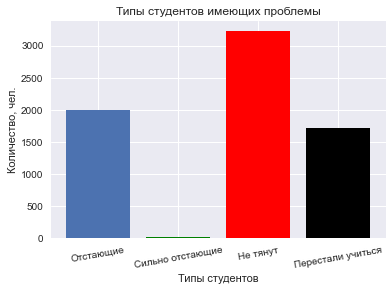

In [1082]:
# Получим обьекты класса Figure и Axses
fig, ax = plt.subplots()
# графики с количеством студентов
ax.bar('Отстающие', df_prob_median_count.count())
ax.bar('Сильно отстающие', df_prob_max_count.count(), color='green')
ax.bar('Не тянут', list_problem_students.count(), color='red')
ax.bar('Перестали учиться', drop_students.count(), color='black')
plt.setp(ax.get_xticklabels(), rotation=10)
plt.xlabel('Типы студентов')
plt.ylabel('Количество, чел.')
plt.title('Типы студентов имеющих проблемы');